In [1]:
import geopandas as gpd
import xarray as xr
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import rioxarray as rxr
from scipy import stats, interpolate
from statsmodels.distributions.empirical_distribution import ECDF
import datetime as dt
from scipy.stats import norm
from copulae import GaussianCopula, ClaytonCopula, FrankCopula, GumbelCopula, StudentCopula # Using Copulae Module
import seaborn as sns
from scipy.stats import kendalltau

In [2]:
# Set dataset dir

dataset = '../../datasets/'
et = os.path.join(dataset, 'et/gha_lsa_et.nc')
precipitation = os.path.join(dataset, 'precipitation_chirps/precip_chirps_gha.nc')
tws = os.path.join(dataset, 'gha_tws.nc')
water_mask = os.path.join(dataset, 'water_mask/water_body.shp')
landform = os.path.join(dataset, 'landform/landform.tif')

In [3]:
# Open and display

et_data = xr.open_dataset(et)['ET']

precipitation_data = xr.open_dataset(precipitation)['precipitation']

tws_data = xr.open_dataset(tws)['twsddk']

# Load the landform GeoTIFF
landform_data = rxr.open_rasterio(landform)

In [4]:
tws_data = tws_data.sel(time=slice('2004-01-01', None))

# Convert units: tws (m) to mm
tws_data = tws_data * 1000 

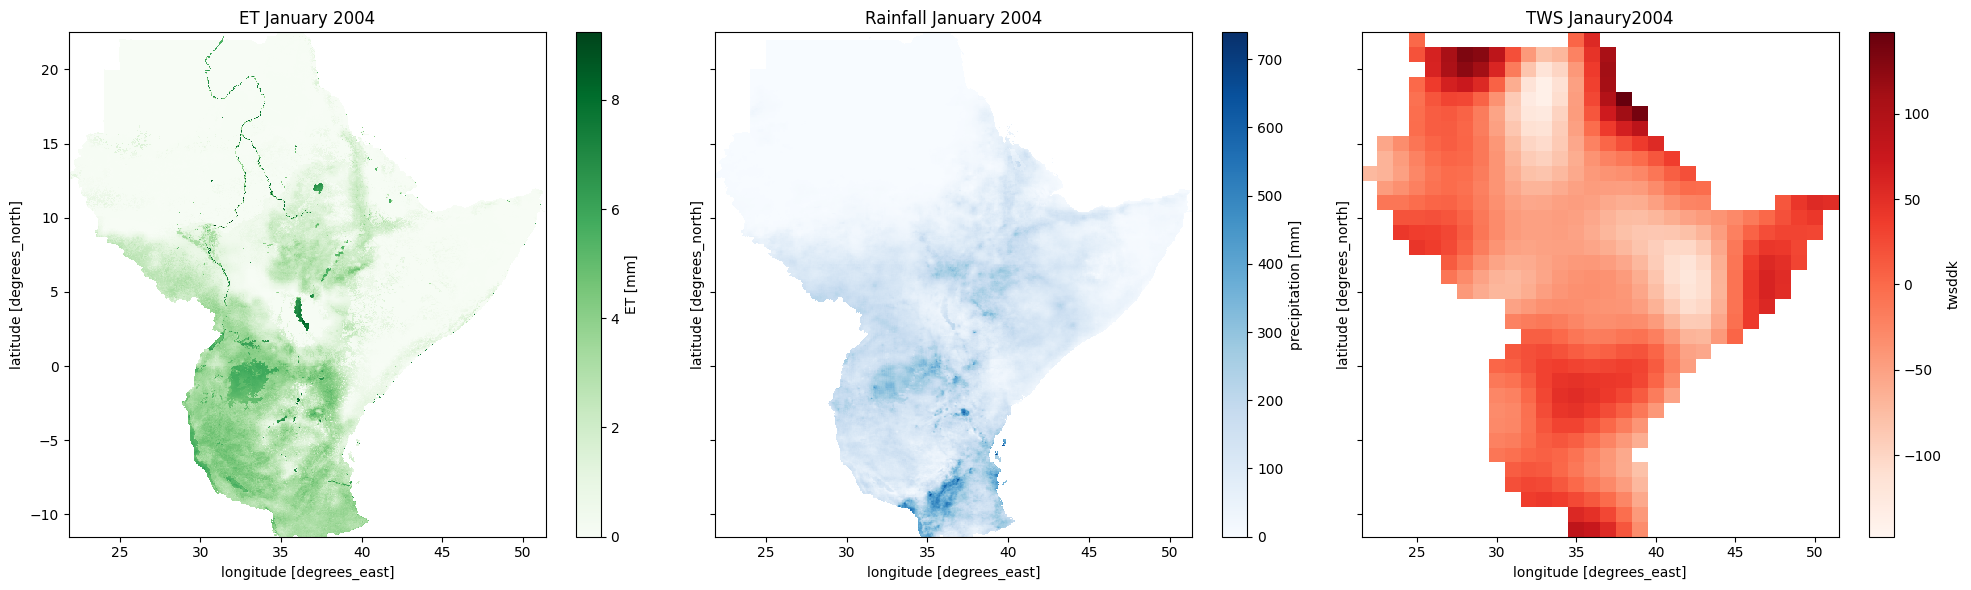

In [5]:
et1 = et_data.isel(time=0)
precip1 = precipitation_data.isel(time=0)
tws1 = tws_data.isel(time=0)

# Set up the figure and axes (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)


# Plot ET
et1.plot(ax=axes[0], cmap="Greens", add_colorbar=True)
axes[0].set_title("ET January {}".format(et1.time.dt.year.values))

# Plot Rainfall
precip1.plot(ax=axes[1], cmap="Blues", add_colorbar=True)
axes[1].set_title("Rainfall January {}".format(precip1.time.dt.year.values))

# Plot TWS
tws1.plot(ax=axes[2], cmap="Reds", add_colorbar=True)
axes[2].set_title("TWS Janaury{}".format(tws1.time.dt.year.values))

plt.tight_layout()
plt.show()

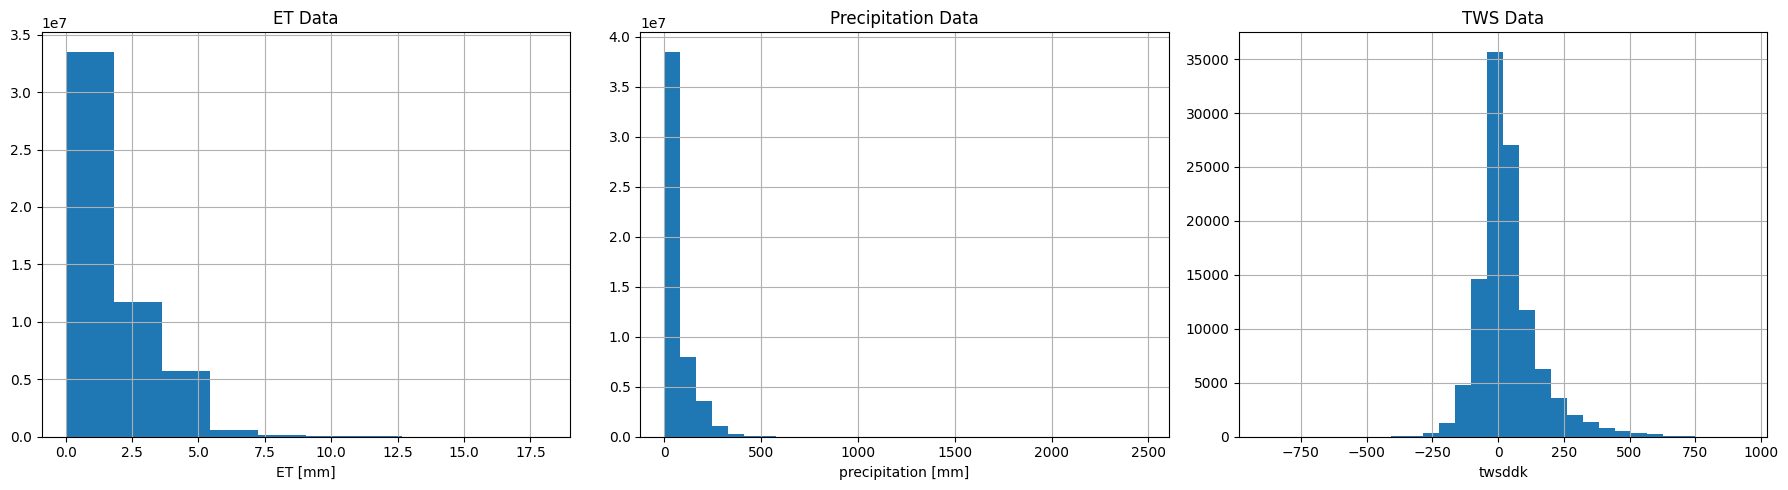

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

et_data.plot.hist(ax=axes[0], bins=10)
axes[0].grid(True)
axes[0].set_title('ET Data')

precipitation_data.plot.hist(ax=axes[1], bins=30)
axes[1].grid(True)
axes[1].set_title('Precipitation Data')

tws_data.plot.hist(ax=axes[2], bins=30)
axes[2].grid(True)
axes[2].set_title('TWS Data')

plt.tight_layout()
plt.show()

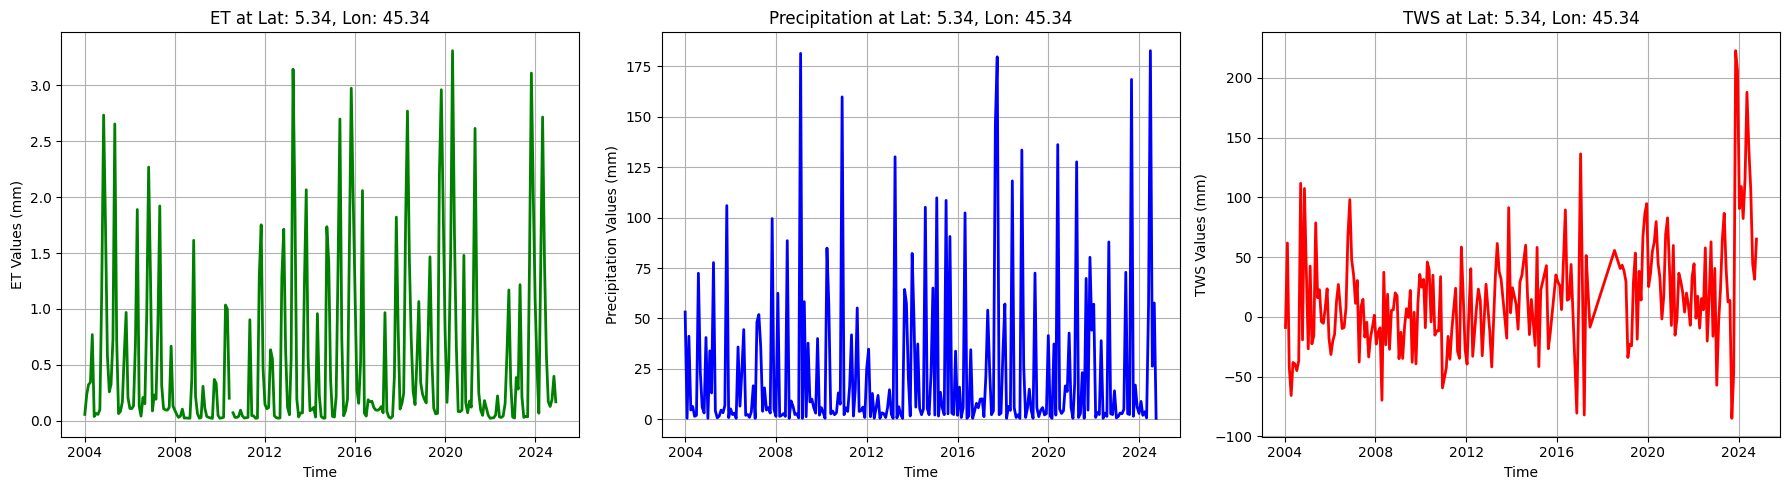

In [502]:
# Variables at a location in GHA

lat = 5.34
lon = 45.34

et_poi = et_data.sel(lat=lat, lon=lon, method='nearest')
pre_poi = precipitation_data.sel(y=lat, x=lon, method='nearest')
tws_poi = tws_data.sel(lat=lat, lon=lon, method='nearest')

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# ET time series
axes[0].plot(et_poi.time, et_poi.values, color='green', linewidth=2)
axes[0].set_title('ET at Lat: {:.2f}, Lon: {:.2f}'.format(lat, lon), fontsize=12)
axes[0].set_xlabel('Time', fontsize=10)
axes[0].set_ylabel('ET Values (mm)', fontsize=10)
axes[0].grid(True)

# Precipitation time series
axes[1].plot(pre_poi.time, pre_poi.values, color='blue', linewidth=2)
axes[1].set_title('Precipitation at Lat: {:.2f}, Lon: {:.2f}'.format(lat, lon), fontsize=12)
axes[1].set_xlabel('Time', fontsize=10)
axes[1].set_ylabel('Precipitation Values (mm)', fontsize=10)
axes[1].grid(True)

# TWS time series
axes[2].plot(tws_poi.time, tws_poi.values, color='red', linewidth=2)
axes[2].set_title('TWS at Lat: {:.2f}, Lon: {:.2f}'.format(lat, lon), fontsize=12)
axes[2].set_xlabel('Time', fontsize=10)
axes[2].set_ylabel('TWS Values (mm)', fontsize=10)
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Variables at a location in GHA

lat = -5.34
lon = 32.34

et_poi = et_data.sel(lat=lat, lon=lon, method='nearest')
pre_poi = precipitation_data.sel(y=lat, x=lon, method='nearest')
tws_poi = tws_data.sel(lat=lat, lon=lon, method='nearest')

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# ET time series
axes[0].plot(et_poi.time, et_poi.values, color='green', linewidth=2)
axes[0].set_title('ET at Lat: {:.2f}, Lon: {:.2f}'.format(lat, lon), fontsize=12)
axes[0].set_xlabel('Time', fontsize=10)
axes[0].set_ylabel('ET Values (mm)', fontsize=10)
axes[0].grid(True)

# Precipitation time series
axes[1].plot(pre_poi.time, pre_poi.values, color='blue', linewidth=2)
axes[1].set_title('Precipitation at Lat: {:.2f}, Lon: {:.2f}'.format(lat, lon), fontsize=12)
axes[1].set_xlabel('Time', fontsize=10)
axes[1].set_ylabel('Precipitation Values (mm)', fontsize=10)
axes[1].grid(True)

# TWS time series
axes[2].plot(tws_poi.time, tws_poi.values, color='red', linewidth=2)
axes[2].set_title('TWS at Lat: {:.2f}, Lon: {:.2f}'.format(lat, lon), fontsize=12)
axes[2].set_xlabel('Time', fontsize=10)
axes[2].set_ylabel('TWS Values (cm)', fontsize=10)
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
landform_data.plot(cmap='tab20', vmax=20)

#### Large TS Plots

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust width and height as needed
plt.plot(et_poi.time, et_poi.values, color='green', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Evapotranspiration (mm)")
# plt.title("Time Series Plot")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust width and height as needed
plt.plot(pre_poi.time, pre_poi.values, color='blue', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Precipitation (mm)")
# plt.title("Time Series Plot")
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))  # Adjust width and height as needed
plt.plot(tws_poi.time, tws_poi.values, color='red', linewidth=2)
plt.xlabel("Year")
plt.ylabel("TWS (mm)")
# plt.title("Time Series Plot")
plt.show()


#### Spatial Alignment

In [ ]:
'''First approach was to resample to the TWS resolution'''

# tws_data.rio.write_crs("EPSG:4326", inplace=True)
# et_data.rio.write_crs("EPSG:4326", inplace=True)
# precipitation_data.rio.write_crs("EPSG:4326", inplace=True)

# # Spatial upscale to 1-degree
# et_resampled = et_data.rio.reproject_match(
#     tws_data, resampling=rasterio.enums.Resampling.average
# ).rename({"x": "lon", "y": "lat"})
# precip_resampled = precipitation_data.rio.reproject_match(
#     tws_data, resampling=rasterio.enums.Resampling.average
# ).rename({"x": "lon", "y": "lat"})


In [7]:
# Resampling the data to Precipitation grid
target_lat = precipitation_data.y
target_lon = precipitation_data.x

# Temporal target: match TWS's time
target_time = tws_data.time

et_data_regrid = et_data.interp(
    lat=target_lat,
    lon=target_lon,
    time=target_time,  # Temporal alignment
    method='linear'
)

precipitation_data_regrid = precipitation_data.interp(
    time=target_time, # Temporal alignment
    method='linear'
)

tws_data_regrid = tws_data.interp(
    lat=target_lat,
    lon=target_lon,
    method='linear'
)

In [8]:
# Transpose to the dims of TWS to match the others
# tws_data_regrid = tws_data_regrid.transpose('time', 'y', 'x')

In [9]:
# Resample the landform to Precipitation resolution
landform_data = landform_data.squeeze('band')

landform_data = landform_data.where(landform_data != 255)

landform_data_regrid = landform_data.interp(
    y=target_lat, 
    x=target_lon,
    method='nearest'
)

In [ ]:
# # Export the resampled datasets
# landform_data_regrid.rio.to_raster("landform_regridded.tif")

In [10]:
# Merge into a single dataset
merged_data = xr.Dataset({
    'ET': et_data_regrid,
    'precipitation': precipitation_data_regrid,
    'TWS': tws_data_regrid,
    'landform': landform_data_regrid.squeeze()  # Remove band dimension if present
})

In [11]:
combined_ds = xr.Dataset({
    'tws': tws_data_regrid,
    'precip': precipitation_data_regrid,
    'et': et_data_regrid,
    'landform': landform_data_regrid
})

# Verify the combined dataset
print(combined_ds)

<xarray.Dataset>
Dimensions:      (time: 219, y: 698, x: 591)
Coordinates:
  * time         (time) datetime64[ns] 2004-01-15T12:00:00 ... 2024-10-15T12:...
    lat          (y) float64 23.12 23.07 23.02 22.97 ... -11.63 -11.68 -11.73
    lon          (x) float64 21.88 21.93 21.98 22.03 ... 51.23 51.28 51.33 51.38
    band         int64 1
  * y            (y) float64 23.12 23.07 23.02 22.97 ... -11.63 -11.68 -11.73
  * x            (x) float64 21.88 21.93 21.98 22.03 ... 51.23 51.28 51.33 51.38
    spatial_ref  int64 0
Data variables:
    tws          (y, x, time) float64 nan nan nan nan nan ... nan nan nan nan
    precip       (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    et           (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    landform     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan


In [12]:
print(merged_data)

<xarray.Dataset>
Dimensions:        (y: 698, x: 591, time: 219)
Coordinates:
    lat            (y) float64 23.12 23.07 23.02 22.97 ... -11.63 -11.68 -11.73
    lon            (x) float64 21.88 21.93 21.98 22.03 ... 51.28 51.33 51.38
  * time           (time) datetime64[ns] 2004-01-15T12:00:00 ... 2024-10-15T1...
    band           int64 1
  * y              (y) float64 23.12 23.07 23.02 22.97 ... -11.63 -11.68 -11.73
  * x              (x) float64 21.88 21.93 21.98 22.03 ... 51.28 51.33 51.38
    spatial_ref    int64 0
Data variables:
    ET             (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    precipitation  (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    TWS            (y, x, time) float64 nan nan nan nan nan ... nan nan nan nan
    landform       (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan


In [15]:
combined_ds.to_netcdf(os.path.join(dataset, 'combined_data.nc'), mode='w')

In [ ]:
subregion_ids = xr.DataArray(combined_ds['landform'].values.flatten()).dropna(dim='dim_0').unique()

In [34]:
subregion_ids = np.unique(combined_ds['landform'].values.flatten())

In [35]:
subregion_ids

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., nan])

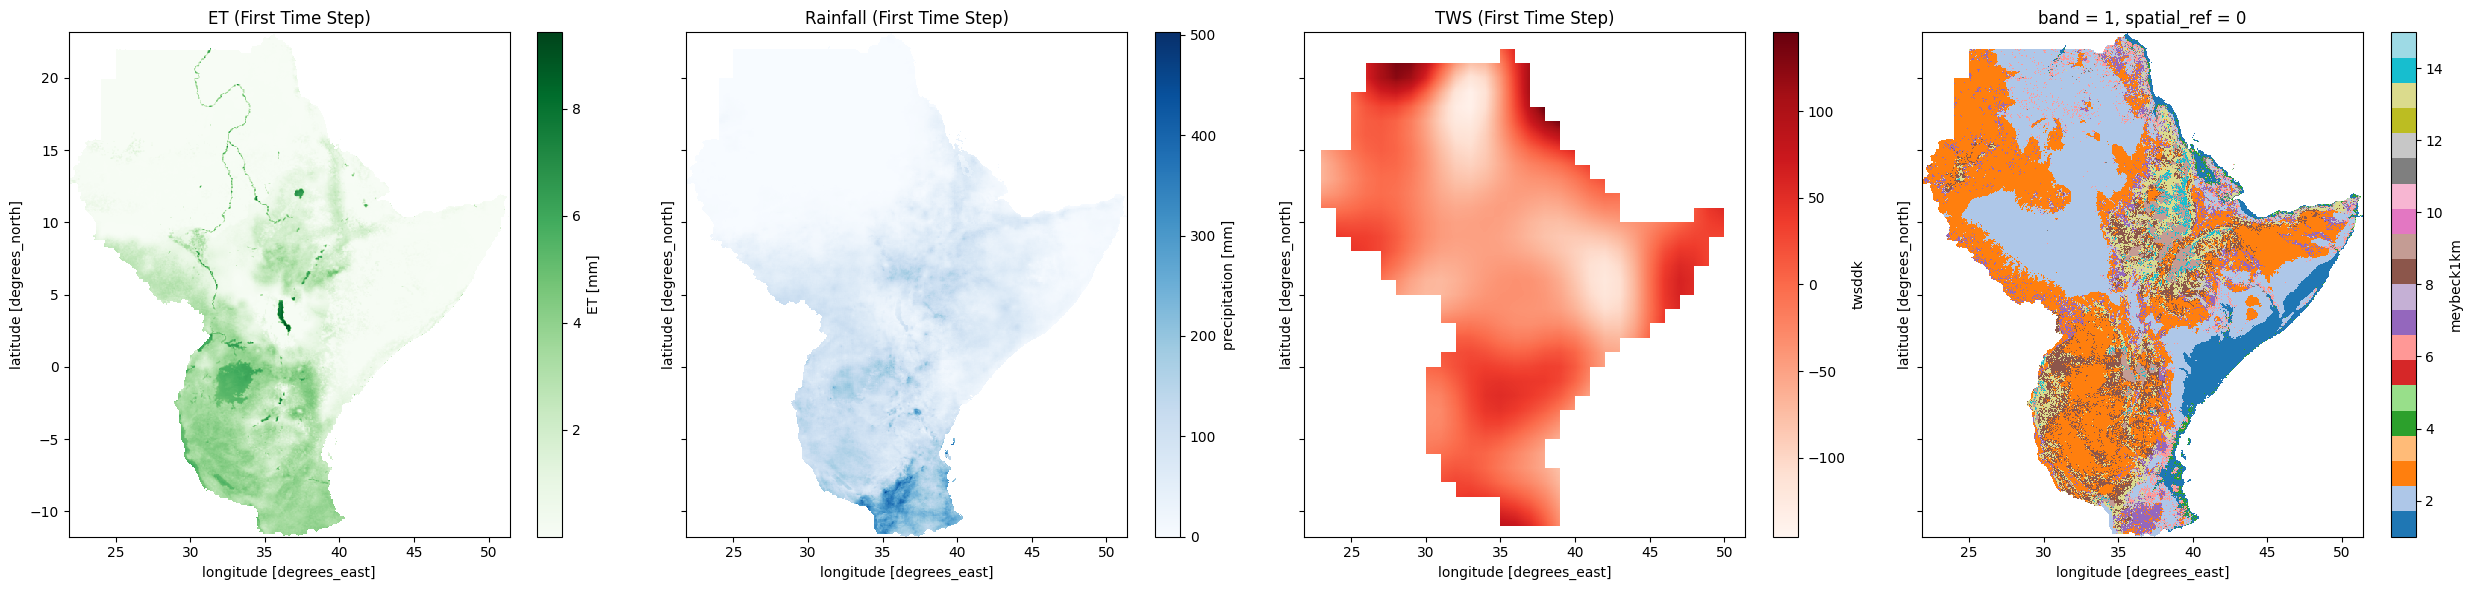

In [36]:
# Plot the regrided datasets

et2 = et_data_regrid.isel(time=0)
precip2 = precipitation_data_regrid.isel(time=0)
tws2 = tws_data_regrid.isel(time=0)


# Set up the figure and axes (1 row, 3 columns)
fig, axes = plt.subplots(1, 4, figsize=(25, 6), sharey=True)


# Plot ET
et2.plot(ax=axes[0], cmap="Greens", add_colorbar=True)
axes[0].set_title("ET (First Time Step)")

# Plot Rainfall
precip2.plot(ax=axes[1], cmap="Blues", add_colorbar=True)
axes[1].set_title("Rainfall (First Time Step)")

# Plot TWS
tws2.plot(ax=axes[2], cmap="Reds", add_colorbar=True)
axes[2].set_title("TWS (First Time Step)")

landform_data_regrid.plot(ax=axes[3], cmap="tab20", add_colorbar=True)

plt.tight_layout()
plt.show()

In [57]:
# Get unique landform classes (subregions)
landform_2d = landform_data_regrid.squeeze()
landform_classes = np.unique(landform_2d.values)
print("Landform classes:", landform_classes)

Landform classes: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. nan]


In [512]:
# Assuming landform_2d is at 5 km resolution
for class_value in landform_classes:
    if np.isnan(class_value):
        continue
    mask = landform_2d == class_value
    n_pixels = mask.sum().item()  # Number of True values (valid pixels)
    print(f"Class {class_value}: {n_pixels} pixels")

Class 1.0: 12910 pixels
Class 2.0: 59445 pixels
Class 3.0: 67984 pixels
Class 4.0: 1518 pixels
Class 5.0: 178 pixels
Class 6.0: 5465 pixels
Class 7.0: 13247 pixels
Class 8.0: 17019 pixels
Class 9.0: 5558 pixels
Class 10.0: 11 pixels
Class 11.0: 1258 pixels
Class 12.0: 5513 pixels
Class 13.0: 13514 pixels
Class 14.0: 2460 pixels
Class 15.0: 15 pixels


#### Exponential moving average

In [ ]:
# Span = timestep
def apply_ema(da, span=3):
    return da.rolling_exp(time=span, window_type="span").mean()


ds_et_ema = apply_ema(et_resampled, span=6)
ds_precip_ema = apply_ema(precip_resampled, span=6)

In [ ]:
# Variables at a location in GHA

lat = -5.34
lon = 32.34

et_poi = ds_et_ema.sel(y=lat, x=lon, method='nearest')
pre_poi = ds_precip_ema.sel(y=lat, x=lon, method='nearest')
tws_poi = tws_data.sel(lat=lat, lon=lon, method='nearest')

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# ET time series
axes[0].plot(et_poi.time, et_poi.values, color='green', linewidth=2)
axes[0].set_title('ET at Lat: {:.2f}, Lon: {:.2f}'.format(lat, lon), fontsize=12)
axes[0].set_xlabel('Time', fontsize=10)
axes[0].set_ylabel('ET Values (mm)', fontsize=10)
axes[0].grid(True)

# Precipitation time series
axes[1].plot(pre_poi.time, pre_poi.values, color='blue', linewidth=2)
axes[1].set_title('Precipitation at Lat: {:.2f}, Lon: {:.2f}'.format(lat, lon), fontsize=12)
axes[1].set_xlabel('Time', fontsize=10)
axes[1].set_ylabel('Precipitation Values (mm)', fontsize=10)
axes[1].grid(True)

# TWS time series
axes[2].plot(tws_poi.time, tws_poi.values, color='red', linewidth=2)
axes[2].set_title('TWS at Lat: {:.2f}, Lon: {:.2f}'.format(lat, lon), fontsize=12)
axes[2].set_xlabel('Time', fontsize=10)
axes[2].set_ylabel('TWS Values (cm)', fontsize=10)
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [43]:
# Get unique landform values (subregion IDs), excluding NaN or invalid values
# subregion_ids = xr.DataArray(combined_ds['landform'].values.flatten()).dropna(dim='dim_0').unique()

# Dictionary to store subregion datasets
subregion_datasets = {}

# Loop through each subregion
for subregion_id in subregion_ids:
    if np.isnan(subregion_id): 
        continue
    # Mask the combined dataset where landform matches the subregion ID
    subregion_mask = combined_ds['landform'] == subregion_id
    subregion_ds = combined_ds.where(subregion_mask, drop=True)
    subregion_datasets[subregion_id.item()] = subregion_ds

# Example: Access subregion 1
print(subregion_datasets[1])

<xarray.Dataset>
Dimensions:      (y: 671, x: 337, time: 219)
Coordinates:
  * time         (time) datetime64[ns] 2004-01-15T12:00:00 ... 2024-10-15T12:...
    lat          (y) float64 23.12 23.07 23.02 22.97 ... -11.28 -11.33 -11.38
    lon          (x) float64 30.33 30.38 30.48 30.53 ... 51.18 51.28 51.33 51.38
    band         int64 1
  * y            (y) float64 23.12 23.07 23.02 22.97 ... -11.28 -11.33 -11.38
  * x            (x) float64 30.33 30.38 30.48 30.53 ... 51.18 51.28 51.33 51.38
    spatial_ref  int64 0
Data variables:
    tws          (y, x, time) float64 nan nan nan nan nan ... nan nan nan nan
    precip       (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    et           (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    landform     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan


In [44]:
subregion_datasets.keys()

dict_keys([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0])

In [58]:
# Dictionary to store data per subregion
subregion_data = {}

for class_value in landform_classes:
    if np.isnan(class_value): 
        continue
    # Create a mask for the current landform class
    mask = landform_2d == class_value

    # Apply mask to each dataset
    tws_subregion = merged_data['TWS'].where(mask, drop=True)
    et_subregion = merged_data['ET'].where(mask, drop=True)
    precip_subregion = merged_data['precipitation'].where(mask, drop=True)

    # Store in dictionary (you can flatten spatial dims if needed)
    subregion_data[class_value] = {
        "tws": tws_subregion,
        "et": et_subregion,
        "precip": precip_subregion
    }

### Standardization Anomalies

In [62]:
'''To remove climatology, calculate the monthly climatology (long-term mean and
standard deviation for each month) and then compute standardized anomalies for 
each variable (tws, precip, et) per subregion.'''

# Function to calculate standardized anomalies
def calc_standardized_anomalies(data, var_name):
    # Group by month and calculate climatological mean and std
    monthly_clim = data[var_name].groupby('time.month').mean('time')
    monthly_std = data[var_name].groupby('time.month').std('time')
    
    # Compute anomalies: (value - mean) / std
    anomalies = data[var_name].groupby('time.month') - monthly_clim
    standardized_anomalies = anomalies.groupby('time.month') / monthly_std
    
    return standardized_anomalies

In [63]:
# Apply to each subregion
for subregion_id, ds in subregion_datasets.items():
    ds['tws_anom'] = calc_standardized_anomalies(ds, 'tws')
    ds['precip_anom'] = calc_standardized_anomalies(ds, 'precip')
    ds['et_anom'] = calc_standardized_anomalies(ds, 'et')
    
    # Update the dataset
    subregion_datasets[subregion_id] = ds

# Example: Check anomalies for subregion 1
print(subregion_datasets[1][['tws_anom', 'precip_anom', 'et_anom']])

<xarray.Dataset>
Dimensions:      (y: 671, x: 337, time: 219)
Coordinates:
  * time         (time) datetime64[ns] 2004-01-15T12:00:00 ... 2024-10-15T12:...
    lat          (y) float64 23.12 23.07 23.02 22.97 ... -11.28 -11.33 -11.38
    lon          (x) float64 30.33 30.38 30.48 30.53 ... 51.18 51.28 51.33 51.38
    band         int64 1
  * y            (y) float64 23.12 23.07 23.02 22.97 ... -11.28 -11.33 -11.38
  * x            (x) float64 30.33 30.38 30.48 30.53 ... 51.18 51.28 51.33 51.38
    spatial_ref  int64 0
    month        (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 1 2 3 4 5 6 7 8 9 10
Data variables:
    tws_anom     (y, x, time) float64 nan nan nan nan nan ... nan nan nan nan
    precip_anom  (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    et_anom      (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan


(array([1.2540e+03, 8.9500e+02, 1.1270e+03, 1.1680e+03, 1.0640e+03,
        9.0700e+02, 7.0200e+02, 9.7400e+02, 2.1820e+03, 3.4700e+03,
        5.4710e+03, 7.2810e+03, 1.0937e+04, 1.7798e+04, 2.3875e+04,
        3.2017e+04, 4.3184e+04, 5.1282e+04, 5.9522e+04, 6.6441e+04,
        7.9014e+04, 8.2683e+04, 8.9451e+04, 9.3028e+04, 7.9342e+04,
        8.3108e+04, 8.1616e+04, 8.4321e+04, 7.4660e+04, 6.1669e+04,
        5.9612e+04, 4.4823e+04, 3.3757e+04, 2.6304e+04, 2.1992e+04,
        2.1567e+04, 1.3726e+04, 9.1180e+03, 6.8570e+03, 5.9220e+03,
        5.2370e+03, 4.4280e+03, 3.7650e+03, 2.8840e+03, 2.9140e+03,
        3.1750e+03, 1.6880e+03, 1.8420e+03, 4.6000e+01, 4.1000e+01]),
 array([-3.77278941, -3.61964471, -3.4665    , -3.3133553 , -3.1602106 ,
        -3.00706589, -2.85392119, -2.70077648, -2.54763178, -2.39448707,
        -2.24134237, -2.08819766, -1.93505296, -1.78190825, -1.62876355,
        -1.47561884, -1.32247414, -1.16932943, -1.01618473, -0.86304002,
        -0.70989532, -0.55

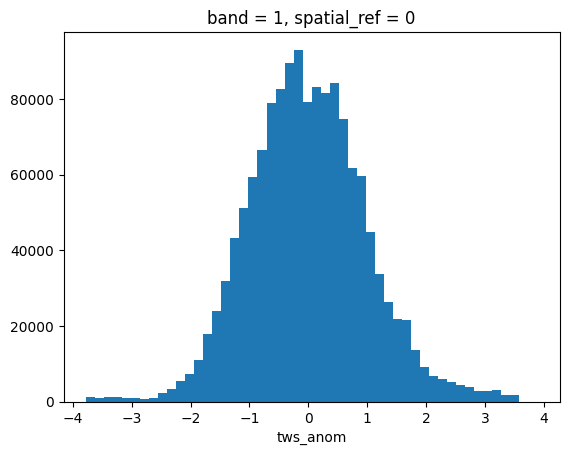

In [76]:
subregion_datasets[1]['tws_anom'].plot.hist(bins=50)

#### Export the anomalies

In [ ]:
# et_st_anomalies.to_netcdf(os.path.join(dataset, 'et_standardized_anomaly.nc'))
# pre_st_anomalies.to_netcdf(os.path.join(dataset, 'precip_standardized_anomaly.nc'))
# tws_st_anomalies.to_netcdf(os.path.join(dataset, 'tws_standardized_anomaly.nc'))

In [98]:
tq = np.sort(subregion_datasets[1]['tws_anom'].values[~np.isnan(subregion_datasets[1]['tws_anom'].values)])
print(tq)

[-3.77278941 -3.7666753  -3.76667132 ...  3.8830731   3.88381283
  3.88444582]


#### Fit Marginal Distributions Using `statsmodels` ECDF

In [115]:
# Function to compute ECDF using statsmodels
def compute_ecdf_statsmodels(data, var_name):
    # Stack and flatten the data, removing NaNs
    flat_data = data[var_name].stack(all_points=['time', 'y', 'x']).dropna(dim='all_points').values
    
    # Compute ECDF
    ecdf = ECDF(flat_data)
    cdf_values = ecdf(flat_data)  # Evaluate ECDF at the data points
    
    # Reconstruct as DataArray
    return xr.DataArray(
        cdf_values,
        coords={'all_points': data[var_name].stack(all_points=['time', 'y', 'x']).dropna(dim='all_points').coords['all_points']},
        dims=['all_points']
    ).unstack()


In [116]:
# Apply to each subregion
for subregion_id, ds in subregion_datasets.items():
    ds['tws_cdf'] = compute_ecdf_statsmodels(ds, 'tws_anom')
    ds['precip_cdf'] = compute_ecdf_statsmodels(ds, 'precip_anom')
    ds['et_cdf'] = compute_ecdf_statsmodels(ds, 'et_anom')
    
    # Update the dataset
    subregion_datasets[subregion_id] = ds

# Example: Check CDFs for the first subregion
first_subregion_id = list(subregion_datasets.keys())[0]
print(subregion_datasets[first_subregion_id][['tws_cdf', 'precip_cdf', 'et_cdf']])

<xarray.Dataset>
Dimensions:      (time: 219, y: 671, x: 337)
Coordinates:
  * time         (time) datetime64[ns] 2004-01-15T12:00:00 ... 2024-10-15T12:...
  * y            (y) float64 23.12 23.07 23.02 22.97 ... -11.28 -11.33 -11.38
  * x            (x) float64 30.33 30.38 30.48 30.53 ... 51.18 51.28 51.33 51.38
    lat          (y) float64 23.12 23.07 23.02 22.97 ... -11.28 -11.33 -11.38
    lon          (x) float64 30.33 30.38 30.48 30.53 ... 51.18 51.28 51.33 51.38
    band         int64 1
    spatial_ref  int64 0
    month        (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 1 2 3 4 5 6 7 8 9 10
Data variables:
    tws_cdf      (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    precip_cdf   (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    et_cdf       (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan


In [128]:
len(subregion_datasets[1]['tws_cdf'].values.flatten())

49521813

In [130]:
flatten = subregion_datasets[1]['precip_anom'].stack(all_points=['time', 'y', 'x']).dropna(dim='all_points').values
len(flatten)

2806096

#### Test workflow for the First Subregion - `The Plains (12,910 pixels)`

In [143]:
# Get the first subregion ID and dataset
first_subregion_id = list(subregion_datasets.keys())[0]
ds = subregion_datasets[first_subregion_id]
print(f"Testing subregion: {first_subregion_id}")

Testing subregion: 1.0


In [149]:
# Function to compute ECDF with a common mask
def compute_ecdf_statsmodels_consistent(ds):
    # Convert the selected variables to a single DataArray with 'variable' dimension
    data_vars = ds[['tws_anom', 'precip_anom', 'et_anom']].to_array(dim='variable')
    
    # Stack spatial and temporal dimensions
    stacked_data = data_vars.stack(all_points=['time', 'y', 'x'])
    
    # Create a common mask where all variables are non-NaN
    common_mask = stacked_data.notnull().all(dim='variable')
    valid_data = stacked_data.where(common_mask, drop=True)
    
    
    # Compute ECDF for each variable
    ecdf_dict = {}
    for var_name in ['tws_anom', 'precip_anom', 'et_anom']:
        flat_data = valid_data[var_name].values
        ecdf = ECDF(flat_data)
        cdf_values = ecdf(flat_data)
        ecdf_dict[var_name] = xr.DataArray(
            cdf_values,
            coords={'all_points': valid_data[var_name].coords['all_points']},
            dims=['all_points']
        ).unstack()
    
    return ecdf_dict['tws_anom'], ecdf_dict['precip_anom'], ecdf_dict['et_anom']

# Compute ECDFs for the first subregion
tws_cdf, precip_cdf, et_cdf = compute_ecdf_statsmodels_consistent(ds)
ds['tws_cdf'] = tws_cdf
ds['precip_cdf'] = precip_cdf
ds['et_cdf'] = et_cdf

# Verify lengths
tws_len = ds['tws_cdf'].stack(all_points=['time', 'y', 'x']).dropna(dim='all_points').size
precip_len = ds['precip_cdf'].stack(all_points=['time', 'y', 'x']).dropna(dim='all_points').size
et_len = ds['et_cdf'].stack(all_points=['time', 'y', 'x']).dropna(dim='all_points').size
print(f"Lengths: tws_cdf={tws_len}, precip_cdf={precip_len}, et_cdf={et_len}")
print(ds[['tws_cdf', 'precip_cdf', 'et_cdf']])

KeyError: 'tws_anom'

In [154]:
ds[1]

KeyError: 1

In [ ]:

# Function to test and select the best copula
def fit_best_copula(tws_cdf, precip_cdf, et_cdf):
    data = pd.DataFrame({
        'tws': tws_cdf.values,
        'precip': precip_cdf.values,
        'et': et_cdf.values
    })
    
    copulas = {
        'Gaussian': GaussianCopula(),
        'Clayton': ClaytonCopula(),
        'Frank': FrankCopula(),
        'Gumbel': GumbelCopula()
    }
    
    fit_results = {}
    for name, copula in copulas.items():
        try:
            copula.fit(data)
            log_likelihood = copula.log_lik(data)
            n_params = len(copula.params)
            aic = -2 * log_likelihood + 2 * n_params
            fit_results[name] = {'copula': copula, 'aic': aic}
        except Exception as e:
            print(f"Error fitting {name} copula: {e}")
            fit_results[name] = {'copula': None, 'aic': np.inf}
    
    best_copula_name = min(fit_results, key=lambda x: fit_results[x]['aic'])
    best_copula = fit_results[best_copula_name]['copula']
    print(f"Best copula: {best_copula_name} (AIC: {fit_results[best_copula_name]['aic']})")
    return best_copula

# Function to compute drought index
def compute_copula_index(ds):
    stacked_data = ds[['tws_cdf', 'precip_cdf', 'et_cdf']].stack(all_points=['time', 'lat', 'lon'])
    tws_cdf = stacked_data['tws_cdf']
    precip_cdf = stacked_data['precip_cdf']
    et_cdf = stacked_data['et_cdf']
    
    best_copula = fit_best_copula(tws_cdf, precip_cdf, et_cdf)
    
    data_for_cdf = pd.DataFrame({
        'tws': tws_cdf.values,
        'precip': precip_cdf.values,
        'et': et_cdf.values
    })
    joint_cdf = best_copula.cdf(data_for_cdf)
    drought_index = 1 - joint_cdf
    
    return xr.DataArray(
        drought_index,
        coords={'all_points': stacked_data.coords['all_points']},
        dims=['all_points']
    ).unstack(), best_copula

# Compute drought index for the first subregion
drought_index, best_copula = compute_copula_index(ds)
ds['drought_index'] = drought_index
print(ds['drought_index'])

In [ ]:
# Plot spatial map for the first time step
plt.figure(figsize=(10, 6))
ds['drought_index'].isel(time=0).plot(cmap='RdBu_r', vmin=0, vmax=1)
plt.title(f"Drought Index - Subregion {first_subregion_id} (First Time Step)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Plot time series averaged over the subregion
plt.figure(figsize=(10, 6))
ds['drought_index'].mean(dim=['lat', 'lon']).plot()
plt.title(f"Drought Index Time Series - Subregion {first_subregion_id}")
plt.xlabel("Time")
plt.ylabel("Drought Index (0 to 1)")
plt.grid(True)
plt.show()

#### Copula Analysis with copulae Module

In [136]:
# Function to test and select the best copula
def fit_best_copula(tws_cdf, precip_cdf, et_cdf):
    # Combine CDFs into a DataFrame (copulae expects a 2D array)
    data = np.vstack([tws_cdf, precip_cdf, et_cdf]).T
    data_df = pd.DataFrame(data, columns=['tws', 'precip', 'et'])
    
    # List of copulas to test
    copulas = {
        'Gaussian': GaussianCopula(dim=3),
        'Clayton': ClaytonCopula(dim=3),
        'Frank': FrankCopula(dim=3),
        'Gumbel': GumbelCopula(dim=3)
    }
    
    # Dictionary to store fit results
    fit_results = {}
    
    # Fit each copula and compute AIC
    for name, copula in copulas.items():
        try:
            copula.fit(data_df)
            log_likelihood = copula.log_lik(data_df)
            n_params = len(copula.params)  # Number of parameters in the copula
            aic = -2 * log_likelihood + 2 * n_params  # AIC formula
            fit_results[name] = {'copula': copula, 'aic': aic}
        except Exception as e:
            print(f"Error fitting {name} copula: {e}")
            fit_results[name] = {'copula': None, 'aic': np.inf}
    
    # Select the best copula (lowest AIC)
    best_copula_name = min(fit_results, key=lambda x: fit_results[x]['aic'])
    best_copula = fit_results[best_copula_name]['copula']
    print(f"Best copula for subregion: {best_copula_name} (AIC: {fit_results[best_copula_name]['aic']})")
    
    return best_copula

In [134]:
# Function to compute drought index using the best copula
def compute_copula_index(ds):
    # Stack CDFs and drop NaNs
    stacked_data = xr.Dataset({
        'tws_cdf': ds['tws_cdf'],
        'precip_cdf': ds['precip_cdf'],
        'et_cdf': ds['et_cdf']
    }).stack(all_points=['time', 'y', 'x']).dropna(dim='all_points')
    
    # Extract CDF values
    tws_cdf = stacked_data['tws_cdf'].values
    precip_cdf = stacked_data['precip_cdf'].values
    et_cdf = stacked_data['et_cdf'].values
    
    # Fit the best copula
    best_copula = fit_best_copula(tws_cdf, precip_cdf, et_cdf)
    
    # Compute joint CDF using the best copula
    data_for_cdf = pd.DataFrame({
        'tws': tws_cdf,
        'precip': precip_cdf,
        'et': et_cdf
    })
    joint_cdf = best_copula.cdf(data_for_cdf)
    
    # Drought index: Invert joint CDF (higher values = worse drought)
    drought_index = 1 - joint_cdf
    
    # Reconstruct as DataArray
    return xr.DataArray(
        drought_index,
        coords={'all_points': stacked_data.coords['all_points']},
        dims=['all_points']
    ).unstack(), best_copula



In [137]:
# Apply to each subregion and store the best copula
best_copulas = {}  # To store the best copula for each subregion
for subregion_id, ds in subregion_datasets.items():
    ds['drought_index'], best_copula = compute_copula_index(ds)
    subregion_datasets[subregion_id] = ds
    best_copulas[subregion_id] = best_copula
    
    # Example output
    print(f"Subregion {subregion_id} drought index computed.")

# Example: Check drought index for the first subregion
print(subregion_datasets[first_subregion_id]['drought_index'])

                tws        precip            et
count  1.390176e+06  1.390176e+06  1.390176e+06
mean   5.000000e-01  5.000000e-01  5.000000e-01
std    2.886750e-01  2.886750e-01  2.886750e-01
min    7.193329e-07  7.193329e-07  7.193329e-07
25%    2.500004e-01  2.500004e-01  2.500004e-01
50%    5.000000e-01  5.000000e-01  5.000000e-01
75%    7.499996e-01  7.499996e-01  7.499996e-01
max    9.999993e-01  9.999993e-01  9.999993e-01
                tws        precip            et
count  1.390176e+06  1.390176e+06  1.390176e+06
mean   5.000000e-01  5.000000e-01  5.000000e-01
std    2.886750e-01  2.886750e-01  2.886750e-01
min    7.193329e-07  7.193329e-07  7.193329e-07
25%    2.500004e-01  2.500004e-01  2.500004e-01
50%    5.000000e-01  5.000000e-01  5.000000e-01
75%    7.499996e-01  7.499996e-01  7.499996e-01
max    9.999993e-01  9.999993e-01  9.999993e-01
Error fitting Clayton copula: object of type 'float' has no len()
                tws        precip            et
count  1.390176e+06  1

/home/jovyan/.local/lib/python3.8/site-packages/copulae/archimedean/gumbel.py:165: UserWarning: For the Gumbel copula, tau must be >= 0. Replacing negative values by 0.
  warnings.warn(warning_message)


                tws        precip            et
count  1.390176e+06  1.390176e+06  1.390176e+06
mean   5.000000e-01  5.000000e-01  5.000000e-01
std    2.886750e-01  2.886750e-01  2.886750e-01
min    7.193329e-07  7.193329e-07  7.193329e-07
25%    2.500004e-01  2.500004e-01  2.500004e-01
50%    5.000000e-01  5.000000e-01  5.000000e-01
75%    7.499996e-01  7.499996e-01  7.499996e-01
max    9.999993e-01  9.999993e-01  9.999993e-01


/home/jovyan/.local/lib/python3.8/site-packages/copulae/archimedean/gumbel.py:211: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ln = offset + np.log(np.exp(lip - offset[:, None]).sum(1))


Error fitting Gumbel copula: object of type 'float' has no len()
Best copula for subregion: Gaussian (AIC: -124455.97989720064)


IOStream.flush timed out


Subregion 1.0 drought index computed.
                tws        precip            et
count  1.183291e+07  1.183291e+07  1.183291e+07
mean   5.000000e-01  5.000000e-01  5.000000e-01
std    2.886751e-01  2.886751e-01  2.886751e-01
min    8.451004e-08  8.451004e-08  8.451004e-08
25%    2.500000e-01  2.500000e-01  2.500000e-01
50%    5.000000e-01  5.000000e-01  5.000000e-01
75%    7.500000e-01  7.500000e-01  7.500000e-01
max    9.999999e-01  9.999999e-01  9.999999e-01
                tws        precip            et
count  1.183291e+07  1.183291e+07  1.183291e+07
mean   5.000000e-01  5.000000e-01  5.000000e-01
std    2.886751e-01  2.886751e-01  2.886751e-01
min    8.451004e-08  8.451004e-08  8.451004e-08
25%    2.500000e-01  2.500000e-01  2.500000e-01
50%    5.000000e-01  5.000000e-01  5.000000e-01
75%    7.500000e-01  7.500000e-01  7.500000e-01
max    9.999999e-01  9.999999e-01  9.999999e-01
Error fitting Clayton copula: object of type 'float' has no len()



KeyboardInterrupt



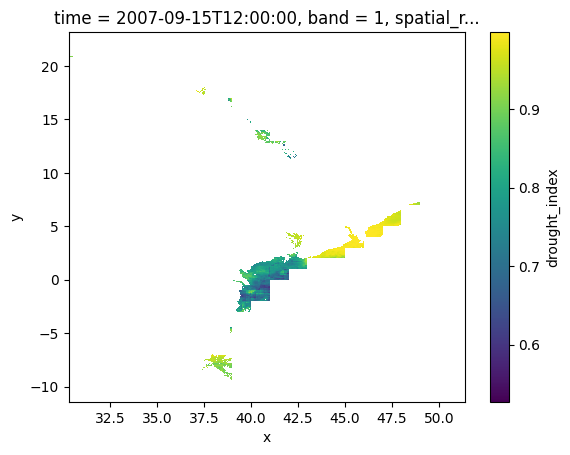

In [140]:
subregion_datasets[first_subregion_id]['drought_index'].isel(time=44).plot()

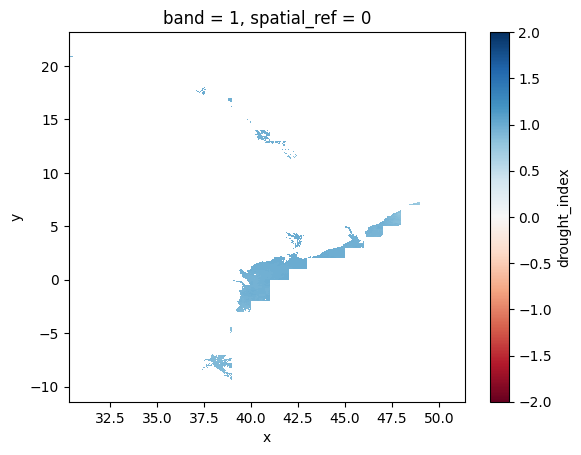

In [142]:
subregion_datasets[first_subregion_id]['drought_index'].sel(time=slice("2011-01-01", "2011-05-31")).mean(dim="time").plot(
    robust=True, cmap="RdBu", vmin=-2, vmax=2)

### Regional Anomalies

In [ ]:
def standardized_anomaly(data):
    # Compute monthly climatology
    climatology = data.groupby('time.month').mean(dim='time')
    # Compute standard deviation
    std_dev = data.groupby('time.month').std(dim='time')
    
    # Compute anomaly
    anomaly = data.groupby('time.month') - climatology
    # Standardize anomaly
    standardized_anomaly = anomaly / std_dev
    
    return standardized_anomaly

# Compute standardized anomalies for each dataset
et_anomaly = standardized_anomaly(et_data)
precipitation_anomaly = standardized_anomaly(precipitation_data)
tws_anomaly = standardized_anomaly(tws_data)

In [679]:
# Loop through each subregion
for class_value in subregion_data:
    # Extract raw data for the subregion
    tws = subregion_data[class_value]["tws"]
    et = subregion_data[class_value]["et"]
    precip = subregion_data[class_value]["precip"]

    tws_mean = tws.groupby("time.month").mean("time", skipna=True)
    tws_std = tws.groupby("time.month").std("time", skipna=True)
    
    et_mean = et.groupby("time.month").mean("time", )
    et_std = et.groupby("time.month").std("time", )
    
    precip_mean = precip.groupby("time.month").mean("time", skipna=True)
    precip_std = precip.groupby("time.month").std("time", skipna=True)
    
    # Calculate monthly anomalies
    tws_anomaly = tws.groupby("time.month") - tws_mean
    et_anomaly = et.groupby("time.month") - et_mean
    precip_anomaly = precip.groupby("time.month") - precip_mean

    # Calculate standardized anomalies
    tws_st_anomaly = tws_anomaly / tws_std
    et_st_anomaly = et_anomaly / et_std
    precip_st_anomaly = precip_anomaly / precip_std

    # Store the anomalies
    subregion_data[class_value]["tws_anomaly"] = tws_st_anomaly
    subregion_data[class_value]["et_anomaly"] = et_st_anomaly
    subregion_data[class_value]["precip_anomaly"] = precip_st_anomaly

In [688]:
import os
import xarray as xr
import numpy as np
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from copulae import EmpiricalCopula, GaussianCopula
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set dataset directory
dataset = '../../datasets/'
et_path = os.path.join(dataset, 'et/gha_lsa_et.nc')
precip_path = os.path.join(dataset, 'precipitation_chirps/precip_chirps_gha.nc')
tws_path = os.path.join(dataset, 'gha_tws.nc')
water_mask_path = os.path.join(dataset, 'water_mask/water_body.shp')
landform_path = os.path.join(dataset, 'landform/landform.tif')

# Load datasets
def load_nc_data(filepath, var_name):
    """Load NetCDF file and extract the required variable"""
    ds = xr.open_dataset(filepath)
    return ds[var_name].load()

et = et_data
precip = precipitation_data
tws = tws_data

# Load landform data
landform = rasterio.open(landform_path)
landform_data = landform.read(1)

# Define climatology (mean and std deviation per month)
def compute_standardized_anomalies(data):
    """Compute standardized anomalies for each grid cell."""
    monthly_mean = data.groupby('time.month').mean('time')
    monthly_std = data.groupby('time.month').std('time')
    standardized_anomaly = (data.groupby('time.month') - monthly_mean) / monthly_std
    return standardized_anomaly

et_anomaly = compute_standardized_anomalies(et)
precip_anomaly = compute_standardized_anomalies(precip)
tws_anomaly = compute_standardized_anomalies(tws)

# Compute Empirical CDF transformation
def ecdf_transform(data):
    """Convert standardized anomalies to ECDF values (pseudo-probabilities)."""
    ecdf_vals = np.zeros_like(data)
    for i in range(data.shape[1]):  # Iterate over spatial grid
        for j in range(data.shape[2]):
            valid_values = data[:, i, j][~np.isnan(data[:, i, j])]
            ecdf = np.argsort(np.argsort(valid_values)) / len(valid_values)
            ecdf_vals[:, i, j][~np.isnan(data[:, i, j])] = ecdf
    return ecdf_vals

et_ecdf = ecdf_transform(et_anomaly.values)
precip_ecdf = ecdf_transform(precip_anomaly.values)
tws_ecdf = ecdf_transform(tws_anomaly.values)

# Fit copula for each subregion
unique_subregions = np.unique(landform_data[landform_data > 0])

drought_indices = {}

for subregion in unique_subregions:
    mask = landform_data == subregion
    et_subregion = et_ecdf[:, mask].flatten()
    precip_subregion = precip_ecdf[:, mask].flatten()
    tws_subregion = tws_ecdf[:, mask].flatten()

    # Stack variables
    data = np.vstack((et_subregion, precip_subregion, tws_subregion)).T
    data = data[~np.isnan(data).any(axis=1)]  # Remove NaNs

    # Fit Gaussian Copula
    copula = GaussianCopula(dim=3)
    copula.fit(data)

    # Compute Copula-based drought index (joint probability)
    drought_index = copula.cdf(data)
    
    # Store result
    drought_indices[subregion] = drought_index.reshape(-1, sum(mask.flatten()))

# Merge subregions back
final_drought_index = np.full_like(landform_data, np.nan, dtype=np.float32)

for subregion in unique_subregions:
    mask = landform_data == subregion
    final_drought_index[mask] = np.mean(drought_indices[subregion], axis=0)  # Aggregate

# Visualization
plt.imshow(final_drought_index, cmap='RdYlBu_r', interpolation='nearest')
plt.colorbar(label='Multivariate Drought Index')
plt.title('Drought Index for Greater Horn of Africa')
plt.show()


IndexError: boolean index did not match indexed array along dimension 1; dimension is 697 but corresponding boolean dimension is 4188

In [667]:
tq = np.sort(subregion_data_new[1]['tws_anomaly'].values[~np.isnan(subregion_data_new[1]['tws_anomaly'].values)])
print(t)

[-7.83476469 -7.8268617  -7.73760702 ...  6.15291829  6.15577158
  6.16053542]


In [680]:
tqm = np.sort(subregion_data[1]['tws_anomaly'].values[~np.isnan(subregion_data[1]['tws_anomaly'].values)])
print(t)

[-7.83476469 -7.8268617  -7.73760702 ...  6.15291829  6.15577158
  6.16053542]


In [677]:
len(subregion_data_new[1]['tws_anomaly'])

671

In [668]:
# Subregion 1 (class_value = 1)
tws_anomaly_1 = subregion_data[1]["tws_anomaly"].values.flatten()
et_anomaly_1 = subregion_data[1]["et_anomaly"].values.flatten()
precip_anomaly_1 = subregion_data[1]["precip_anomaly"].values.flatten()

# Remove NaNs for class 1
# valid_1 = ~np.isnan(tws_anomaly_1) & ~np.isnan(et_anomaly_1) & ~np.isnan(precip_anomaly_1)
tws_anomaly_1 = tws_anomaly_1[~np.isnan(tws_anomaly_1)]
et_anomaly_1 = et_anomaly_1[~np.isnan(et_anomaly_1)]
precip_anomaly_1 = precip_anomaly_1[~np.isnan(precip_anomaly_1)]

In [669]:
print(tws_anomaly_1.shape, et_anomaly_1.shape, precip_anomaly_1.shape)

(1410141,) (2638720,) (2806096,)


In [514]:
# Subregion 1 (class_value = 1)
tws_anomaly_1 = subregion_data[1]["tws_anomaly_q"].values.flatten()
et_anomaly_1 = subregion_data[1]["et_anomaly_q"].values.flatten()
precip_anomaly_1 = subregion_data[1]["precip_anomaly_q"].values.flatten()

# Remove NaNs for class 1
valid_1 = ~np.isnan(tws_anomaly_1) & ~np.isnan(et_anomaly_1) & ~np.isnan(precip_anomaly_1)
tws_anomaly_1 = tws_anomaly_1[valid_1]
et_anomaly_1 = et_anomaly_1[valid_1]
precip_anomaly_1 = precip_anomaly_1[valid_1]

In [106]:
print(tws_anomaly_1.shape, et_anomaly_1.shape, precip_anomaly_1.shape)

NameError: name 'tws_anomaly_1' is not defined

In [681]:
# Subregion 1 (class_value = 1)
tws_anomaly_1 = subregion_data[1]["tws_anomaly"].values.flatten()
et_anomaly_1 = subregion_data[1]["et_anomaly"].values.flatten()
precip_anomaly_1 = subregion_data[1]["precip_anomaly"].values.flatten()

# Remove NaNs for class 1
valid_1 = ~np.isnan(tws_anomaly_1) & ~np.isnan(et_anomaly_1) & ~np.isnan(precip_anomaly_1)
tws_anomaly_1 = tws_anomaly_1[valid_1]
et_anomaly_1 = et_anomaly_1[valid_1]
precip_anomaly_1 = precip_anomaly_1[valid_1]

In [682]:
print(tws_anomaly_1.shape, et_anomaly_1.shape, precip_anomaly_1.shape)

(901260,) (901260,) (901260,)


In [ ]:
# Assuming landform_classes = [1, 2, 3] (adjust based on your data)
# Process each subregion separately

# Subregion 1 (class_value = 1)
tws_anomaly_1 = subregion_data[1]["tws_anomaly"].values.flatten()
et_anomaly_1 = subregion_data[1]["et_anomaly"].values.flatten()
precip_anomaly_1 = subregion_data[1]["precip_anomaly"].values.flatten()

# Remove NaNs for class 1
valid_1 = ~np.isnan(tws_anomaly_1) & ~np.isnan(et_anomaly_1) & ~np.isnan(precip_anomaly_1)
tws_anomaly_1 = tws_anomaly_1[valid_1]
et_anomaly_1 = et_anomaly_1[valid_1]
precip_anomaly_1 = precip_anomaly_1[valid_1]

# Transform to uniform [0,1] for class 1
u_tws_1 = stats.norm.cdf(tws_anomaly_1)
u_et_1 = stats.norm.cdf(et_anomaly_1)
u_precip_1 = stats.norm.cdf(precip_anomaly_1)

# Store transformed data for class 1
subregion_data[1]["u_tws"] = u_tws_1
subregion_data[1]["u_et"] = u_et_1
subregion_data[1]["u_precip"] = u_precip_1

# Subregion 2 (class_value = 2)
tws_anomaly_2 = subregion_data[2]["tws_anomaly"].values.flatten()
et_anomaly_2 = subregion_data[2]["et_anomaly"].values.flatten()
precip_anomaly_2 = subregion_data[2]["precip_anomaly"].values.flatten()

# Remove NaNs for class 2
valid_2 = ~np.isnan(tws_anomaly_2) & ~np.isnan(et_anomaly_2) & ~np.isnan(precip_anomaly_2)
tws_anomaly_2 = tws_anomaly_2[valid_2]
et_anomaly_2 = et_anomaly_2[valid_2]
precip_anomaly_2 = precip_anomaly_2[valid_2]

# Transform to uniform [0,1] for class 2
u_tws_2 = stats.norm.cdf(tws_anomaly_2)
u_et_2 = stats.norm.cdf(et_anomaly_2)
u_precip_2 = stats.norm.cdf(precip_anomaly_2)

# Store transformed data for class 2
subregion_data[2]["u_tws"] = u_tws_2
subregion_data[2]["u_et"] = u_et_2
subregion_data[2]["u_precip"] = u_precip_2

# Subregion 3 (class_value = 3)
tws_anomaly_3 = subregion_data[3]["tws_anomaly"].values.flatten()
et_anomaly_3 = subregion_data[3]["et_anomaly"].values.flatten()
precip_anomaly_3 = subregion_data[3]["precip_anomaly"].values.flatten()

# Remove NaNs for class 3
valid_3 = ~np.isnan(tws_anomaly_3) & ~np.isnan(et_anomaly_3) & ~np.isnan(precip_anomaly_3)
tws_anomaly_3 = tws_anomaly_3[valid_3]
et_anomaly_3 = et_anomaly_3[valid_3]
precip_anomaly_3 = precip_anomaly_3[valid_3]

# Transform to uniform [0,1] for class 3
u_tws_3 = stats.norm.cdf(tws_anomaly_3)
u_et_3 = stats.norm.cdf(et_anomaly_3)
u_precip_3 = stats.norm.cdf(precip_anomaly_3)

# Store transformed data for class 3
subregion_data[3]["u_tws"] = u_tws_3
subregion_data[3]["u_et"] = u_et_3
subregion_data[3]["u_precip"] = u_precip_3

# Optional: Print to compare at a glance
print("Subregion 1 - Mean u_tws:", u_tws_1.mean(), "u_et:", u_et_1.mean(), "u_precip:", u_precip_1.mean())
print("Subregion 2 - Mean u_tws:", u_tws_2.mean(), "u_et:", u_et_2.mean(), "u_precip:", u_precip_2.mean())
print("Subregion 3 - Mean u_tws:", u_tws_3.mean(), "u_et:", u_et_3.mean(), "u_precip:", u_precip_3.mean())

## Marginal Distribution

#### Clean data and stack

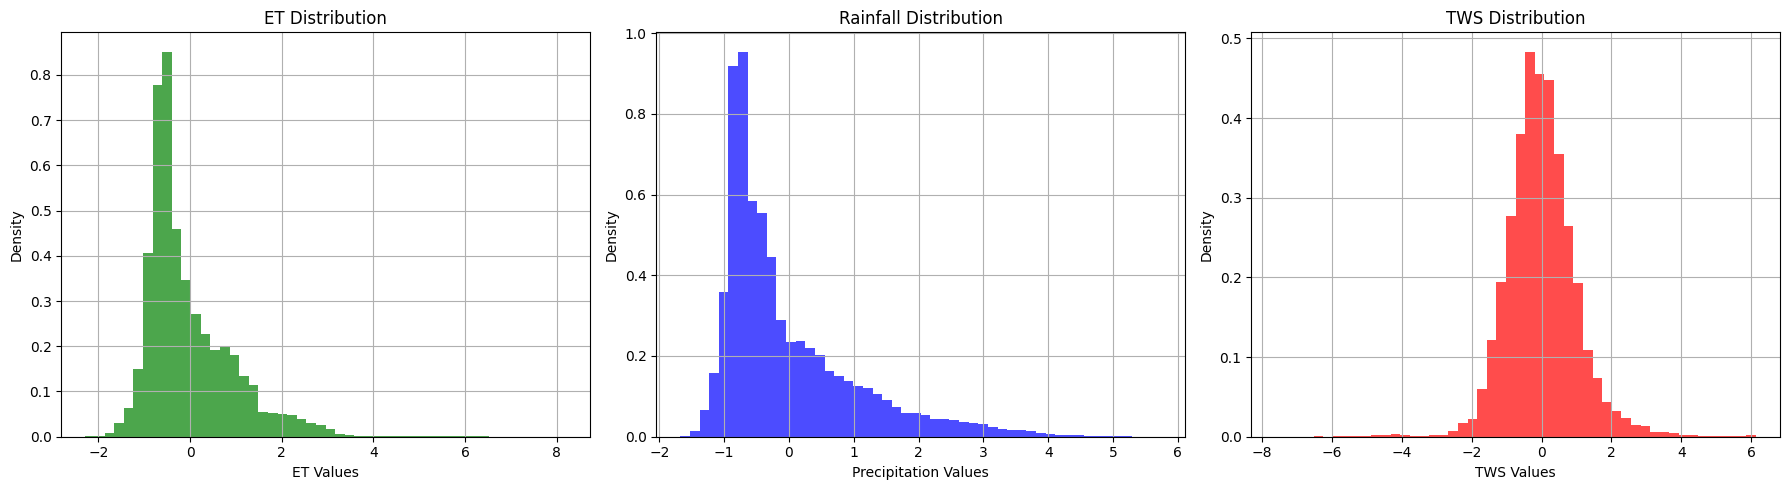

In [516]:
# Plot the histogram
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot ET Histogram
axes[0].hist(et_anomaly_1, bins=50, density=True, alpha=0.7, color='green')
axes[0].set_title("ET Distribution")
axes[0].set_xlabel("ET Values")
axes[0].set_ylabel("Density")
axes[0].grid(True)

# Plot Precipitation Histogram
axes[1].hist(precip_anomaly_1, bins=50, density=True, alpha=0.7, color='blue')
axes[1].set_title("Rainfall Distribution")
axes[1].set_xlabel("Precipitation Values")
axes[1].set_ylabel("Density")
axes[1].grid(True)

# Plot TWS Histogram
axes[2].hist(tws_anomaly_1, bins=50, density=True, alpha=0.7, color='red')
axes[2].set_title("TWS Distribution")
axes[2].set_xlabel("TWS Values")
axes[2].set_ylabel("Density")
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


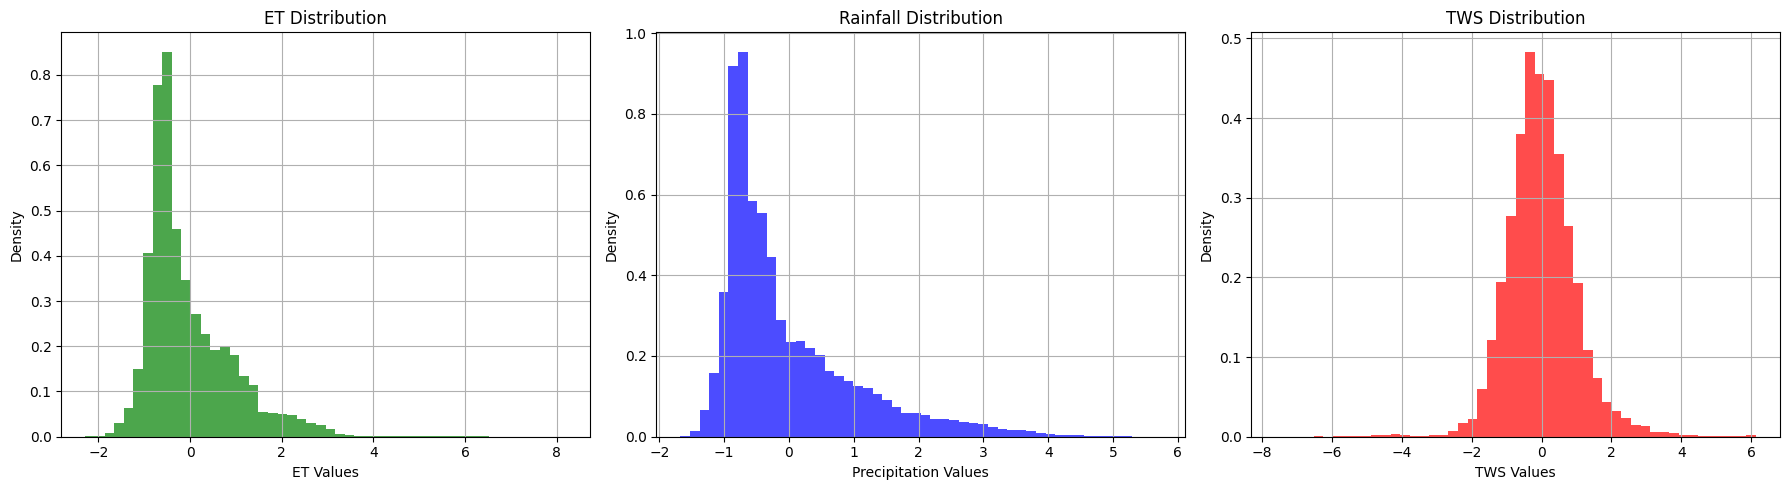

In [517]:
# Plot the histogram
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot ET Histogram
axes[0].hist(et_anomaly_1, bins=50, density=True, alpha=0.7, color='green')
axes[0].set_title("ET Distribution")
axes[0].set_xlabel("ET Values")
axes[0].set_ylabel("Density")
axes[0].grid(True)

# Plot Precipitation Histogram
axes[1].hist(precip_anomaly_1, bins=50, density=True, alpha=0.7, color='blue')
axes[1].set_title("Rainfall Distribution")
axes[1].set_xlabel("Precipitation Values")
axes[1].set_ylabel("Density")
axes[1].grid(True)

# Plot TWS Histogram
axes[2].hist(tws_anomaly_1, bins=50, density=True, alpha=0.7, color='red')
axes[2].set_title("TWS Distribution")
axes[2].set_xlabel("TWS Values")
axes[2].set_ylabel("Density")
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Plot the histogram
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot ET Histogram
axes[0].hist(et_anomaly_1, bins=50, density=True, alpha=0.7, color='green')
axes[0].set_title("ET Distribution")
axes[0].set_xlabel("ET Values")
axes[0].set_ylabel("Density")
axes[0].grid(True)

# Plot Precipitation Histogram
axes[1].hist(precip_anomaly_1, bins=50, density=True, alpha=0.7, color='blue')
axes[1].set_title("Rainfall Distribution")
axes[1].set_xlabel("Precipitation Values")
axes[1].set_ylabel("Density")
axes[1].grid(True)

# Plot TWS Histogram
axes[2].hist(tws_anomaly_1, bins=50, density=True, alpha=0.7, color='red')
axes[2].set_title("TWS Distribution")
axes[2].set_xlabel("TWS Values")
axes[2].set_ylabel("Density")
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [518]:
# Compute ECDF for ET
ecdf_et = ECDF(et_anomaly_1)

# Compute ECDF for Precipitation
ecdf_precip = ECDF(precip_anomaly_1)

# Compute ECDF for TWS
ecdf_twsa = ECDF(tws_anomaly_1)


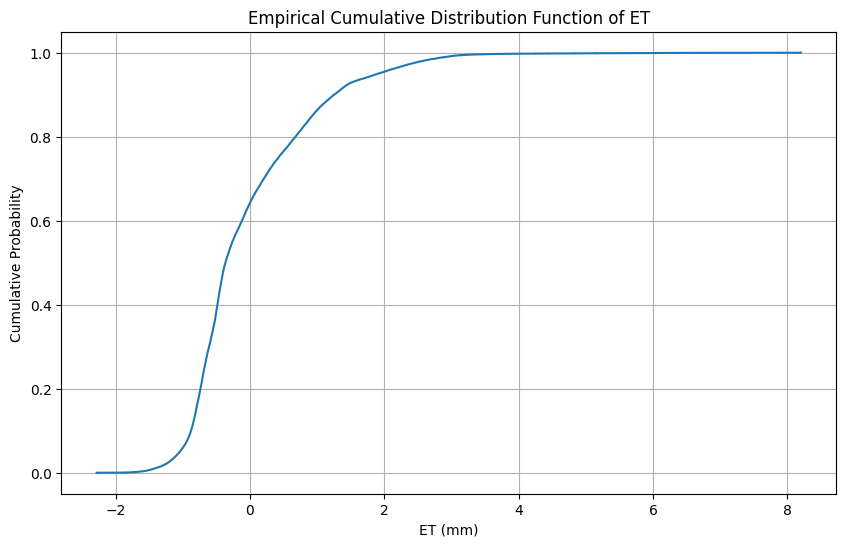

In [519]:
plt.figure(figsize=(10, 6))
plt.step(ecdf_et.x, ecdf_et.y, where='post')
plt.xlabel('ET (mm)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function of ET')
plt.grid(True)
plt.show()

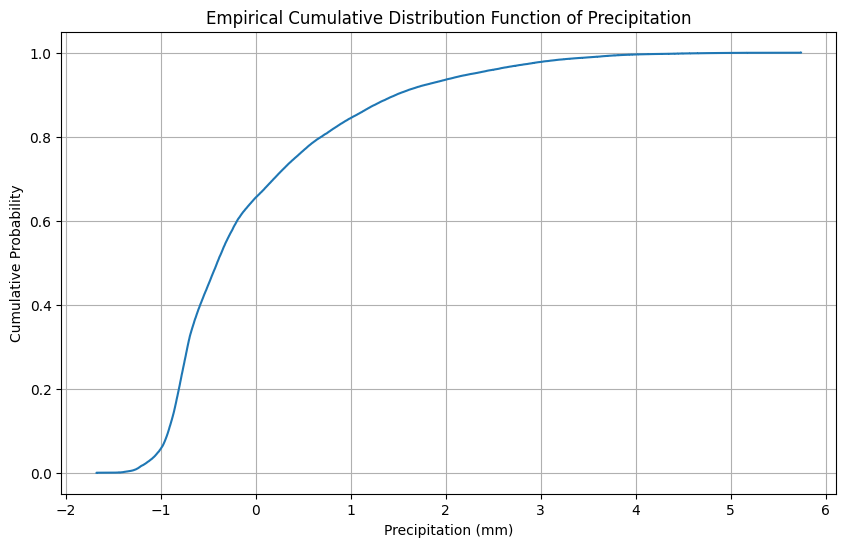

In [520]:
plt.figure(figsize=(10, 6))
plt.step(ecdf_precip.x, ecdf_precip.y, where='post')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function of Precipitation')
plt.grid(True)
plt.show()


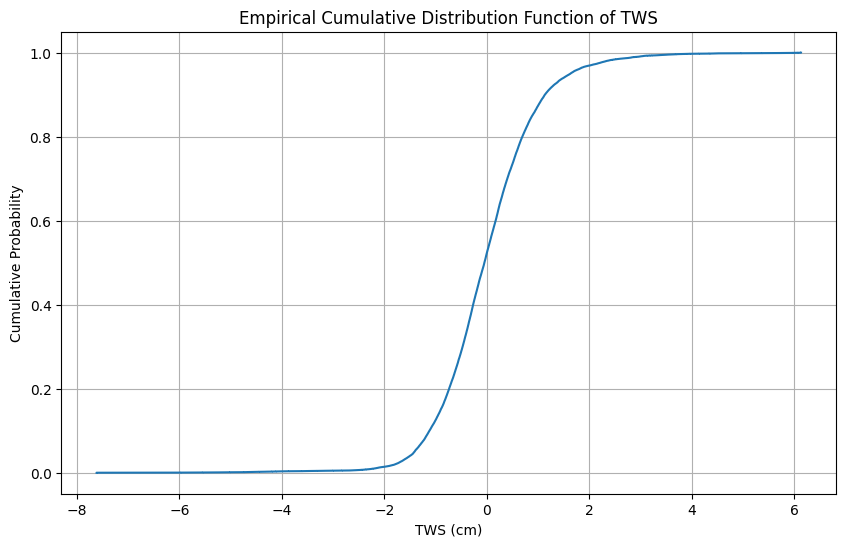

In [521]:
plt.figure(figsize=(10, 6))
plt.step(ecdf_twsa.x, ecdf_twsa.y, where='post')
plt.xlabel('TWS (cm)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function of TWS')
plt.grid(True)
plt.show()

In [522]:
len(et_anomaly_1)

75105

#### Transform to uniform margin

In [523]:
# Transform TWSA data
uniform_twsa = ecdf_twsa(tws_anomaly_1)

# Transform Precip data
uniform_precip = ecdf_precip(precip_anomaly_1)

# Transform ET data
uniform_et = ecdf_et(et_anomaly_1)


#### Copula Fitting

In [524]:
# Select subset of the data
uniform_data = np.column_stack([uniform_et[:50000], uniform_precip[:50000], uniform_twsa[:50000]])

In [527]:
# Initialize copulas
copulas = {
 # Archimidean Copulas
    "Frank": FrankCopula(dim=3),
    "Clayton": ClaytonCopula(dim=3),
    "Gumbel": GumbelCopula(dim=3),
    
 # Elliptical Copulas
    "Gaussian": GaussianCopula(dim=3), 
    "t-Copula": StudentCopula(dim=3),
}


In [528]:

results = {}
for name, copula in copulas.items():
    try:
        copula.fit(uniform_data)
        
        # log-likelihood
        log_lik = copula.log_lik(uniform_data)
        
        if name == 't-Copula':
            n_params = copula.params[1].size
        elif name == 'Clayton' or name == 'Gumbel' or name == 'Frank':
            n_params = np.array(copula.params).size
        elif name == 'Gaussian':
            n_params = copula.params.size
        aic = -2 * log_lik + 2 * n_params
        bic = -2 * log_lik + np.log(uniform_data.shape[0]) * n_params
        
        #
        
        results[name] = {"Log-Likelihood": log_lik, "AIC": aic, "BIC": bic, "Parameters": copula.params}
        print(f"{name} Copula: Log-Likelihood={log_lik:.2f}, AIC={aic:.2f}, BIC={bic:.2f}")
    except Exception as e:
        print(f"Error fitting {name} Copula: {e}")

# Step 4: Select the best copula
best_copula_aic = min(results.items(), key=lambda x: x[1]["AIC"])
best_copula_bic = min(results.items(), key=lambda x: x[1]["BIC"])

print("\nBest Copula by AIC:")
print(f"Name: {best_copula_aic[0]}, AIC: {best_copula_aic[1]['AIC']:.2f}, Parameters: {best_copula_aic[1]['Parameters']}")
print("Best Copula by BIC:")
print(f"Name: {best_copula_bic[0]}, BIC: {best_copula_bic[1]['BIC']:.2f}, Parameters: {best_copula_bic[1]['Parameters']}")

# Optional: Store the best copula for further use
best_copula_name = best_copula_aic[0]  # or use BIC
best_copula = copulas[best_copula_name]

Error fitting Frank Copula: theta must be positive when dim > 2
Error fitting Clayton Copula: theta must be positive when dim > 2


/home/jovyan/.local/lib/python3.8/site-packages/copulae/archimedean/gumbel.py:165: UserWarning: For the Gumbel copula, tau must be >= 0. Replacing negative values by 0.
  warnings.warn(warning_message)


Gumbel Copula: Log-Likelihood=10.60, AIC=-19.20, BIC=-10.38
Gaussian Copula: Log-Likelihood=4.41, AIC=-2.82, BIC=23.64
t-Copula Copula: Log-Likelihood=2.52, AIC=0.95, BIC=27.41

Best Copula by AIC:
Name: Gumbel, AIC: -19.20, Parameters: 1.0035878695394485
Best Copula by BIC:
Name: Gumbel, BIC: -10.38, Parameters: 1.0035878695394485


In [ ]:
# lower_tail = np.mean((u_data[:, 0] < 0.1) & (u_data[:, 1] < 0.1))
# print(f"Observed Lower Tail Dependence: {lower_tail:.3f}")

In [532]:
best_copula

### Tail

In [533]:

et = et_anomaly_1
tws = tws_anomaly_1
precip = precip_anomaly_1
# Put data into a DataFrame for convenience
data = pd.DataFrame({'ET': et, 'TWS': tws, 'Precip': precip})


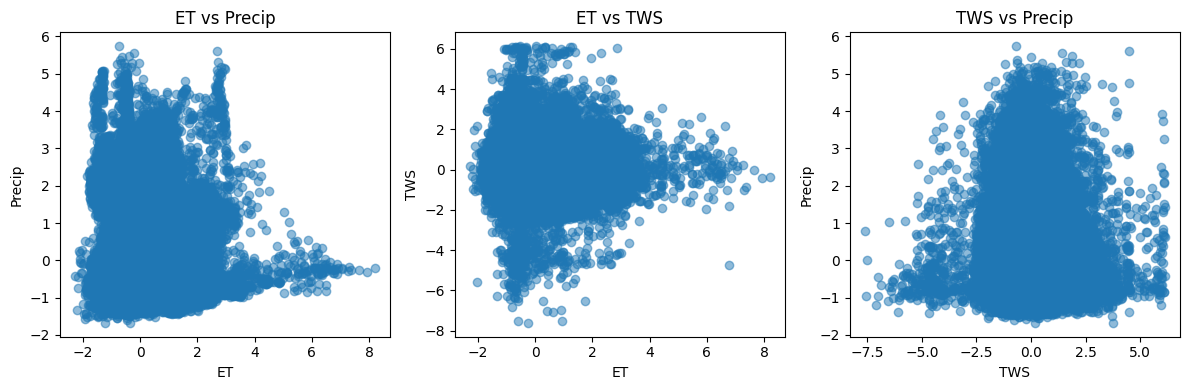

In [549]:

# 1. Pairwise Scatterplots
plt.figure(figsize=(12, 4))

# ET vs Precip
plt.subplot(1, 3, 1)
plt.scatter(data['ET'], data['Precip'], alpha=0.5)
plt.xlabel('ET')
plt.ylabel('Precip')
plt.title('ET vs Precip')

# ET vs TWS
plt.subplot(1, 3, 2)
plt.scatter(data['ET'], data['TWS'], alpha=0.5)
plt.xlabel('ET')
plt.ylabel('TWS')
plt.title('ET vs TWS')

# TWS vs Precip
plt.subplot(1, 3, 3)
plt.scatter(data['TWS'], data['Precip'], alpha=0.5)
plt.xlabel('TWS')
plt.ylabel('Precip')
plt.title('TWS vs Precip')

plt.tight_layout()
plt.show()



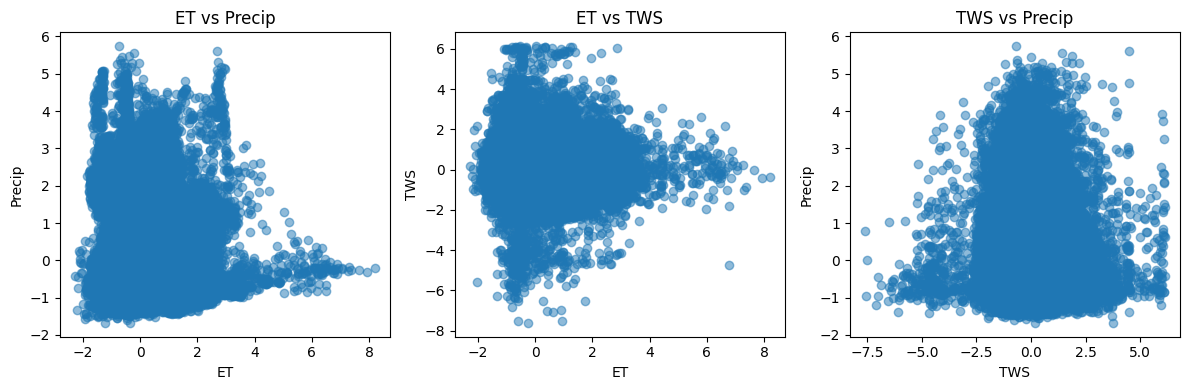

In [550]:

# 1. Pairwise Scatterplots
plt.figure(figsize=(12, 4))

# ET vs Precip
plt.subplot(1, 3, 1)
plt.scatter(data['ET'], data['Precip'], alpha=0.5)
plt.xlabel('ET')
plt.ylabel('Precip')
plt.title('ET vs Precip')

# ET vs TWS
plt.subplot(1, 3, 2)
plt.scatter(data['ET'], data['TWS'], alpha=0.5)
plt.xlabel('ET')
plt.ylabel('TWS')
plt.title('ET vs TWS')

# TWS vs Precip
plt.subplot(1, 3, 3)
plt.scatter(data['TWS'], data['Precip'], alpha=0.5)
plt.xlabel('TWS')
plt.ylabel('Precip')
plt.title('TWS vs Precip')

plt.tight_layout()
plt.show()



In [534]:
# 2. Kendall’s Tau Correlation
pairs = [('ET', 'Precip'), ('ET', 'TWS'), ('TWS', 'Precip')]
print("\nKendall's Tau Correlations:")
for var1, var2 in pairs:
    tau, p_value = kendalltau(data[var1], data[var2])
    print(f"{var1} vs {var2}: Tau = {tau:.3f}, p-value = {p_value:.3f}")
    # Note: p-value < 0.05 suggests significant dependence



Kendall's Tau Correlations:
ET vs Precip: Tau = 0.035, p-value = 0.000
ET vs TWS: Tau = 0.002, p-value = 0.408
TWS vs Precip: Tau = -0.001, p-value = 0.732


In [ ]:
# 3. Tail Dependence Check (Lower and Upper 10%)
def check_tail_dependence(x, y, tail_percent=0.1):
    n = len(x)
    threshold = int(n * tail_percent)
    
    # Sort data and get extremes
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]
    
    # Lower tail: P(Y < low | X < low)
    lower_x = x_sorted[:threshold]
    lower_y = y_sorted[:threshold]
    lower_count = np.sum(lower_y < np.percentile(y, 10))  # Y also in bottom 10%
    lambda_lower = lower_count / threshold
    
    # Upper tail: P(Y > high | X > high)
    upper_x = x_sorted[-threshold:]
    upper_y = y_sorted[-threshold:]
    upper_count = np.sum(upper_y > np.percentile(y, 90))  # Y also in top 10%
    lambda_upper = upper_count / threshold
    
    return lambda_lower, lambda_upper

print("\nTail Dependence Estimates (10% tails):")
for var1, var2 in pairs:
    lambda_l, lambda_u = check_tail_dependence(data[var1].values, data[var2].values)
    print(f"{var1} vs {var2}: Lower Tail = {lambda_l:.3f}, Upper Tail = {lambda_u:.3f}")
    # If lambda > 0, there's tail dependence; closer to 1 means stronger

# Optional: Highlight extremes in scatterplot (e.g., ET vs Precip)
plt.figure(figsize=(6, 6))
plt.scatter(data['ET'], data['Precip'], alpha=0.5, label='All Data')
# Lower 10% of ET
low_et_mask = data['ET'] < np.percentile(data['ET'], 10)
plt.scatter(data['ET'][low_et_mask], data['Precip'][low_et_mask], 
            color='red', label='Lower 10% ET', alpha=0.7)
# Upper 10% of ET
high_et_mask = data['ET'] > np.percentile(data['ET'], 90)
plt.scatter(data['ET'][high_et_mask], data['Precip'][high_et_mask], 
            color='blue', label='Upper 10% ET', alpha=0.7)
plt.xlabel('ET')
plt.ylabel('Precip')
plt.title('ET vs Precip with Extremes')
plt.legend()
plt.show()

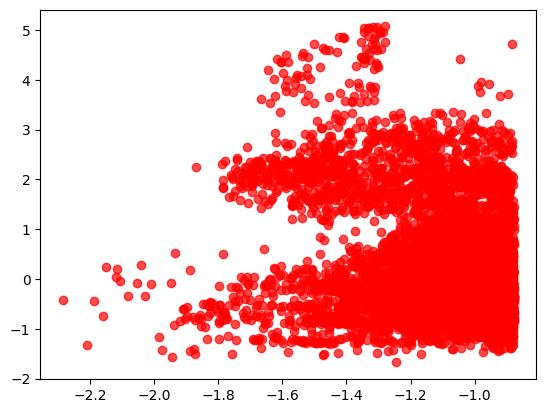

In [535]:
low_et_mask = data['ET'] < np.percentile(data['ET'], 10)
plt.scatter(data['ET'][low_et_mask], data['Precip'][low_et_mask], 
            color='red', label='Lower 10% ET', alpha=0.7)

### Validate the Selected Copula


In [537]:
# Simulate new uniform marginals from the copula
simulated_data = best_copula.random(50000)

In [538]:
simulated_data

array([[0.38624495, 0.10474579, 0.72558786],
       [0.26558991, 0.42073881, 0.83157015],
       [0.73933785, 0.02447972, 0.35062747],
       ...,
       [0.57868411, 0.11488229, 0.26180409],
       [0.59244761, 0.74734307, 0.27589665],
       [0.82235782, 0.09058505, 0.31068397]])

In [539]:
# Validate all pairs
pairs = [("ET", "Precip", 0, 1), ("ET", "TWS", 0, 2), ("Precip", "TWS", 1, 2)]
for var1, var2, idx1, idx2 in pairs:
    tau_obs = kendalltau(uniform_data[:, idx1], uniform_data[:, idx2])[0]
    tau_sim = kendalltau(simulated_data[:, idx1], simulated_data[:, idx2])[0]
    print(f"Observed Tau ({var1}-{var2}): {tau_obs:.3f}, Simulated Tau: {tau_sim:.3f}")

Observed Tau (ET-Precip): 0.002, Simulated Tau: 0.000
Observed Tau (ET-TWS): -0.002, Simulated Tau: 0.003
Observed Tau (Precip-TWS): -0.005, Simulated Tau: -0.002


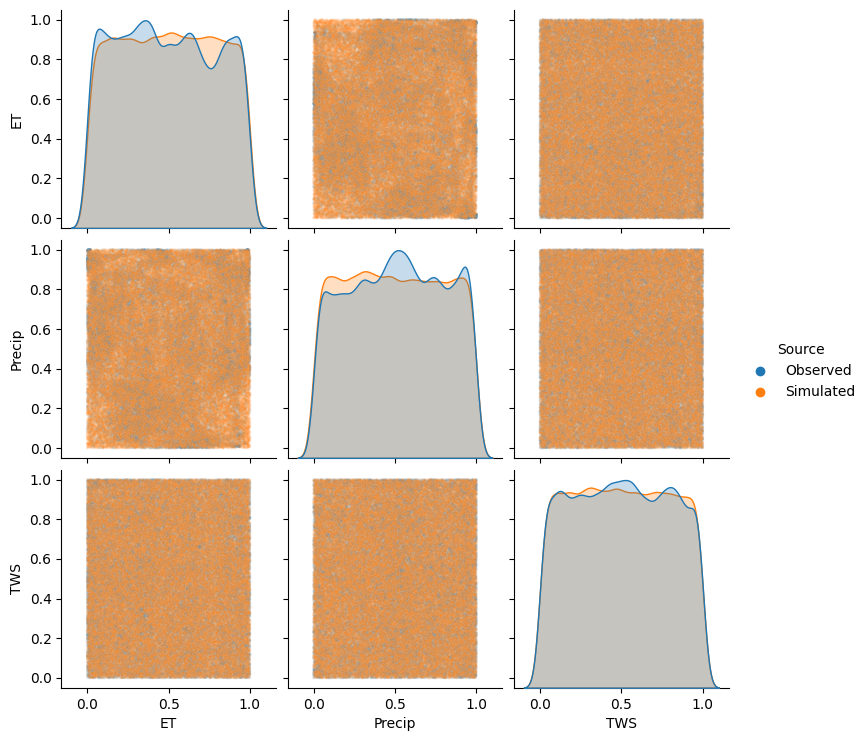

In [540]:
observed_df = pd.DataFrame(uniform_data, columns=["ET", "Precip", "TWS"])
observed_df["Source"] = "Observed"
simulated_df = pd.DataFrame(simulated_data, columns=["ET", "Precip", "TWS"])
simulated_df["Source"] = "Simulated"
combined_df = pd.concat([observed_df.sample(50000, random_state=42), simulated_df])
sns.pairplot(combined_df, hue="Source", diag_kind="kde", plot_kws={"alpha": 0.1, "s": 5})
plt.show()

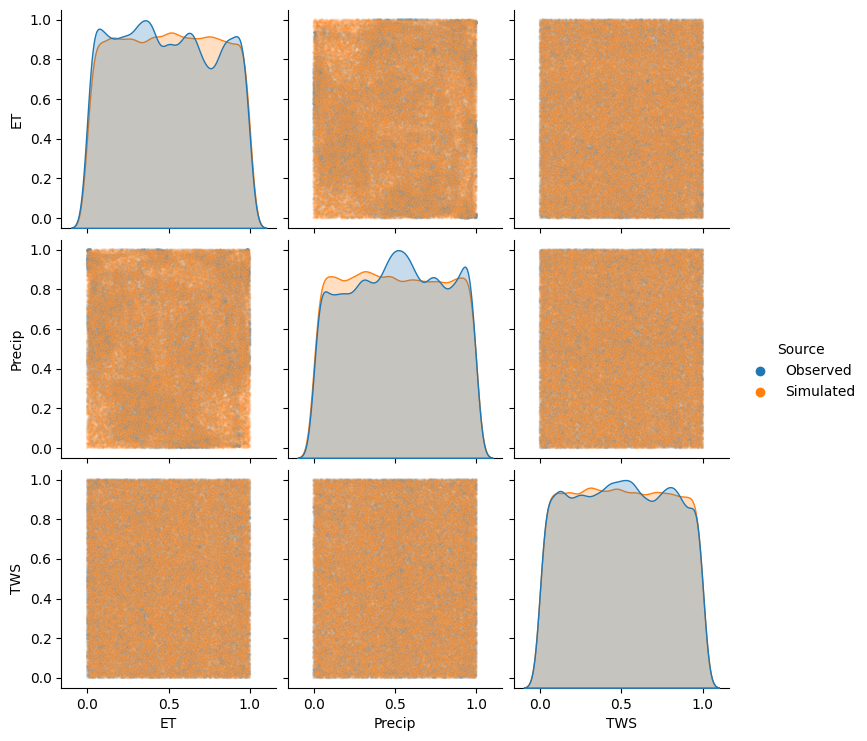

In [541]:
combined_dfn = pd.concat([observed_df[:50000], simulated_df])
sns.pairplot(combined_dfn, hue="Source", diag_kind="kde", plot_kws={"alpha": 0.1, "s": 5})
plt.show()

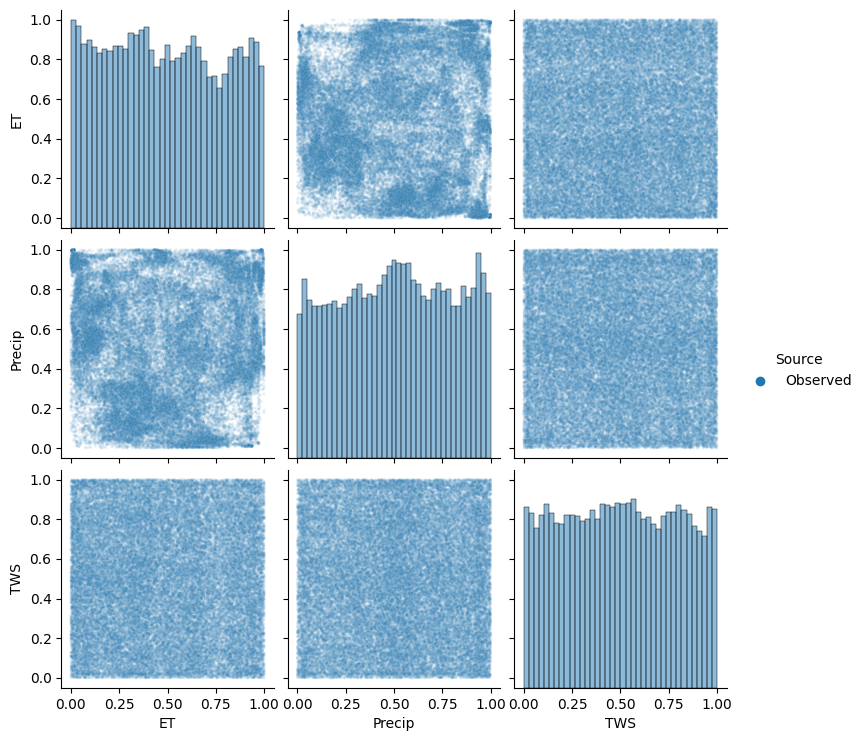

In [630]:
sns.pairplot(observed_df, hue="Source", diag_kind="hist", plot_kws={"alpha": 0.1, "s": 5})
plt.show()

In [ ]:
sns.pairplot(simulated_df, hue="Source", diag_kind="hist", plot_kws={"alpha": 0.1, "s": 5})
plt.show()

In [ ]:
# Calculating probabilities for specific scenarios and checking if they make sense.



### Goodness of fit 

In [545]:
from scipy.stats import kstest

def goodness_of_fit(copula, data):
    
    theoretical_cdf = best_copula.random(len(data))
    # Perform KS test
    ks_stat, p_value = kstest(data.flatten(), theoretical_cdf.flatten())
    return ks_stat, p_value

# Evaluate each copula
results = {}
for name, copula in best_copula.items():
    ks_stat, p_value = goodness_of_fit(copula, uniform_data)
    results[name] = {'KS Statistic': ks_stat, 'p-value': p_value}

# Print results
for name, result in results.items():
    print(f"{name}: KS Statistic = {result['KS Statistic']}, p-value = {result['p-value']}")

AttributeError: 'GumbelCopula' object has no attribute 'items'

In [ ]:
from scipy.stats import kstest

def goodness_of_fit(copula, data):
    
    theoretical_cdf = best_copula.random(len(data))
    # Perform KS test
    ks_stat, p_value = kstest(data.flatten(), theoretical_cdf.flatten())
    return ks_stat, p_value

# Evaluate each copula
results = {}
for name, copula in copulas.items():
    ks_stat, p_value = goodness_of_fit(copula, uniform_data)
    results[name] = {'KS Statistic': ks_stat, 'p-value': p_value}

# Print results
for name, result in results.items():
    print(f"{name}: KS Statistic = {result['KS Statistic']}, p-value = {result['p-value']}")

Frank: KS Statistic = 0.007939999999999947, p-value = 0.0001555115240863802
Clayton: KS Statistic = 0.008279999999999954, p-value = 6.798257456388977e-05
Gumbel: KS Statistic = 0.008046666666666646, p-value = 0.0001204043365796208
Gaussian: KS Statistic = 0.008479999999999932, p-value = 4.111215696485771e-05
t-Copula: KS Statistic = 0.009359999999999924, p-value = 3.8991580738464906e-06


#####  Test the copulas

In [ ]:
# Compute log-likelihood, AIC, and BIC for each copula

results = []
for name, copula in copulas.items():
        log_likelihood = copula.log_lik(uniform_data)
        if name == 't-Copula':
            param_size = copula.params[1].size
        elif name == 'Clayton' or name == 'Gumbel':
            param_size = np.array(copula.params).size
            print(param_size)
        elif name == 'Gaussian':
            param_size = copula.params.size
        aic = -2 * log_likelihood + 2 * param_size
        bic = -2 * log_likelihood + np.log(uniform_data.shape[0]) * param_size
        results.append({
            "Copula": name,
            "Log-Likelihood": log_likelihood,
            "AIC": aic,
            "BIC": bic,
            "Size": param_size
        })


# Display results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

### Create the drought Index

In [623]:
drought_index = xr.DataArray(
    np.full((len(subregion_data[1]["et_anomaly_q"].time), len(subregion_data[1]["et_anomaly_q"].lat), len(subregion_data[1]["et_anomaly_q"].lon)), np.nan),
    coords={"time": subregion_data[1]["et_anomaly_q"].time, "lat": subregion_data[1]["et_anomaly_q"].lat, "lon": subregion_data[1]["et_anomaly_q"].lon},
    dims=["time", "y", "x"]
)

In [ ]:
drought_index_2 = xr.DataArray(
    np.full((len(subregion_data[2]["et_anomaly_q"].time), len(subregion_data[2]["et_anomaly_q"].lat), len(subregion_data[2]["et_anomaly_q"].lon)), np.nan),
    coords={"time": subregion_data[2]["et_anomaly_q"].time, "lat": subregion_data[2]["et_anomaly_q"].lat, "lon": subregion_data[2]["et_anomaly_q"].lon},
    dims=["time", "y", "x"]
)

In [624]:
drought_index

<xarray.DataArray (time: 219, y: 686, x: 543)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2004-01-15T12:00:00 ... 2024-10-15T12:00:00
    lat      (y) float64 22.87 22.82 22.77 22.72 ... -11.58 -11.63 -11.68 -11.73
    lon      (x) float64 23.28 23.33 23.38 23.43 ... 50.83 50.88 50.93 50.98
Dimensions without coordinates: y, x

In [ ]:
for i, lat in enumerate(subregion_data[1]["tws_anomaly_q"].lat.values):
    for j, lon in enumerate(subregion_data[1]["tws_anomaly_q"].lon.values):
        try:
            et_data = subregion_data[1]["tws_anomaly_q"].sel(lat=lat, lon=lon, method="nearest").values
            precip_data = subregion_data[1]["tws_anomaly_q"].sel(lat=lat, lon=lon, method="nearest").values
            tws_data = subregion_data[1]["tws_anomaly_q"].sel(lat=lat, lon=lon, method="nearest").values
            data = np.vstack([et_data, precip_data, tws_data]).T
            valid_mask = ~np.isnan(data).any(axis=1)
            if valid_mask.sum() == 0:
                print(f"No valid data at lat={lat}, lon={lon}")
                continue
            data_clean = data[valid_mask]
            u_data_local = np.vstack([ECDF(data_clean.iloc[:, k])(data_clean.iloc[:, k]) for k in range(3)]).T
            # u_data_local = np.clip(u_data_local, 0.001, 0.999)
            joint_cdf = best_copula.cdf(u_data_local)
            drought_index.values[valid_mask, i, j] = joint_cdf
            print(f"Lat={lat}, Lon={lon}, CDF sample: {joint_cdf[:5]}")
        except Exception as e:
            # continue
            print(f"Error at lat={lat}, lon={lon}: {e}")

In [ ]:
for i, lat in enumerate(subregion_data[1]["tws_anomaly_q"].lat.values):
    for j, lon in enumerate(subregion_data[1]["tws_anomaly_q"].lon.values):
        try:
            et_data = subregion_data[1]["et_anomaly_q"].sel(lat=lat, lon=lon, method="nearest").values
            precip_data = subregion_data[1]["precip_anomaly_q"].sel(lat=lat, lon=lon, method="nearest").values
            tws_data = subregion_data[1]["tws_anomaly_q"].sel(lat=lat, lon=lon, method="nearest").values
            data = np.vstack([et_data, precip_data, tws_data]).T
            valid_mask = ~np.isnan(data).any(axis=1)
            if valid_mask.sum() == 0:
                print(f"No valid data at lat={lat}, lon={lon}")
                continue
            data_clean = data[valid_mask]
            u_data_local = np.vstack([ECDF(data_clean.iloc[:, k])(data_clean.iloc[:, k]) for k in range(3)]).T
            # u_data_local = np.clip(u_data_local, 0.001, 0.999)
            joint_cdf = best_copula.cdf(u_data_local)
            drought_index.values[valid_mask, i, j] = joint_cdf
            print(f"Lat={lat}, Lon={lon}, CDF sample: {joint_cdf[:5]}")
        except Exception as e:
            # continue
            print(f"Error at lat={lat}, lon={lon}: {e}")

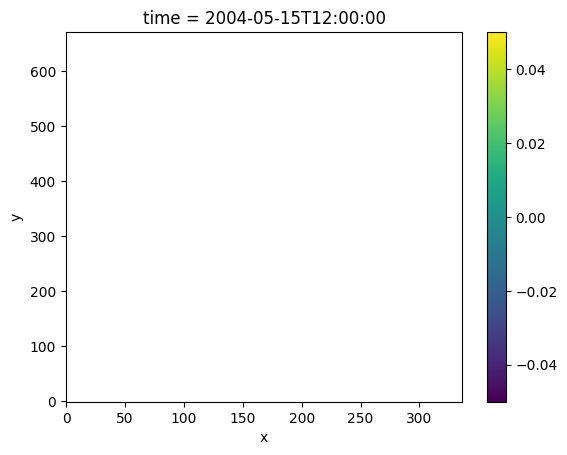

In [ ]:
drought_index.isel(time=4).plot()

In [573]:
valid_mask = ~np.isnan(data).any(axis=1)

In [575]:
data_clean = data[valid_mask]

In [587]:
data_clean.head(5)

ET       TWS    Precip
0  1.332001 -1.390555 -0.207467
1  1.792832 -0.708773 -0.276361
2  1.821116 -0.807276 -0.211600
3  1.742833 -0.449349 -0.283172
4 -0.299521 -0.335738  1.258373

In [588]:
data_clean_np = data_clean.to_numpy()  # Convert DataFrame to NumPy array
u_data_local = np.vstack([ECDF(data_clean_np[:, k])(data_clean_np[:, k]) for k in range(3)]).T

In [597]:
len(u_data_local[:,1])

75105

In [590]:
u_data_local_ = np.vstack([ECDF(data_clean.iloc[:, k])(data_clean.iloc[:, k]) for k in range(3)]).T
u_data_local_

array([[0.90965981, 0.05344518, 0.59508688],
       [0.94403835, 0.20873444, 0.56568804],
       [0.94555622, 0.17540776, 0.59327608],
       ...,
       [0.95715332, 0.85934359, 0.22682911],
       [0.95362493, 0.87815725, 0.30507956],
       [0.97407629, 0.69932761, 0.34844551]])

In [598]:
joint_prob_1 = best_copula.cdf(u_data_local)  # Shape: (n_samples,)

In [608]:
drought_index.values[valid_mask, 5, 4] = joint_prob_1

NameError: name 'drought_index' is not defined

In [600]:
# Drought index (1 - joint_prob: higher = more severe drought)
drought_index_1 = 1 - joint_prob_1
print("Drought index length:", len(drought_index_1))



Drought index length: 75105


In [606]:
# Reshape to original dimensions (e.g., 237, lat, lon)
original_shape = subregion_data[1]["tws_anomaly_q"].shape  # e.g., (237, 5, 4)
if len(drought_index_1) != np.prod(original_shape):
    drought_index_da_1 = xr.DataArray(
        drought_index_1.reshape(original_shape),
        dims=["time", "lat", "lon"],
        coords=subregion_data[1]["tws_anomaly_q"].coords
    )
    subregion_data[1]["drought_index"] = drought_index_da_1
    print("Drought index shape:", drought_index_da_1.shape)
else:
    print("Error: Cannot reshape - length mismatch!")

ValueError: cannot reshape array of size 75105 into shape (671,337,219)

In [605]:
(original_shape)

(671, 337, 219)

In [ ]:
drought_index_standardized = xr.apply_ufunc(norm.ppf, drought_index, keep_attrs=True).rename("Drought Index")

In [ ]:
drought_index_standardized.isel(time=9).plot()

In [ ]:
# Verify
print("Drought Index Min/Max:", drought_index_standardized.min().item(), drought_index_standardized.max().item())
print("Any non-NaN values?", drought_index_standardized.notnull().any().item())
print("Sample values:", drought_index_standardized.isel(time=0, lat=0, lon=0).values)

In [ ]:
print("Sample values:", drought_index_standardized.isel(time=44, lat=11, lon=22))

In [ ]:
print("Any non-NaN values?", drought_index_standardized.notnull().any().item())
print("Fraction of non-NaN values:", drought_index_standardized.notnull().mean().item())
print("Sample at a grid point:", drought_index_standardized.sel(lat=-1.3, lon=36.9, method="nearest").values[:5])

### Spatial Analysis

In [ ]:
# Spatial map for 2011 drought 
drought_index_standardized.sel(time=slice("2011-01-01", "2011-05-31")).mean(dim="time").plot(
    robust=True, cmap="RdBu", vmin=-2, vmax=2
)
plt.title("Drought - 2011 ")
plt.show()

# Time series at Nairobi (~1.3°S, 36.9°E)
drought_index_standardized.sel(lat=0, lon=42, method="nearest").plot()
plt.title("Drought Index Time Series - Nairobi")
plt.axhline(y=-1, color='r', linestyle='--', label="Moderate Drought")
plt.axhline(y=-2, color='darkred', linestyle='--', label="Extreme Drought")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust width and height as needed
drought_index_standardized.sel(lat=9, lon=38.7, method="nearest").plot()
plt.title("GHDI Time Series")
plt.xlabel("Year")
plt.ylabel("GHDI")
# plt.title("Time Series Plot")
# plt.ylim(-3, 3) 
plt.show()
# -1.3, 36.9

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust width and height as needed
drought_index_standardized.sel(lat=-1.3, lon=36.9, method="nearest").plot()
plt.title("GHDI Time Series")
plt.xlabel("Year")
plt.ylabel("GHDI")
# plt.title("Time Series Plot")
# plt.ylim(-3, 3) 
plt.show()
# -1.3, 36.9
# 2.0, 45.3

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust width and height as needed
drought_index_standardized.sel(lat=2, lon=45.3, method="nearest").plot()
plt.title("GHDI Time Series")
plt.xlabel("Year")
plt.ylabel("GHDI")
# plt.title("Time Series Plot")
# plt.ylim(-3, 3) 
plt.show()
# -1.3, 36.9
# 2.0, 45.3

In [ ]:
ghdi_smoothed_3 = drought_index_standardized.rolling(time=3, center=True).mean()


In [ ]:
ghdi_smoothed_3_nairobi = drought_index_standardized.sel(lat=-1.3, lon=36.9, method="nearest")

In [ ]:
ghdi_smoothed_3_nairobi.plot()

In [ ]:
drought_threshold = 0.2

# Validate with drought threshold
z_score_threshold = norm.ppf(drought_threshold)  # ~ -0.84 for 0.2
drought_fraction = (drought_index_standardized < z_score_threshold).mean().item()
print(f"Drought Fraction (< {z_score_threshold:.2f}): {drought_fraction:.3f}")

# Simulate to check probability
simulated_data_gaussian = best_copula.random(50000)
drought_prob = np.all(simulated_data_gaussian < drought_threshold, axis=1).mean()
se = np.sqrt(drought_prob * (1 - drought_prob) / 50000)
print(f"Simulated Drought Prob (all < {drought_threshold}): {drought_prob:.3f} ± {1.96 * se:.3f}")

In [ ]:
nairobi_lat, nairobi_lon = -1.3, 36.9

et_nairobi = et_st_anomalies.sel(lat=nairobi_lat, lon=nairobi_lon, method="nearest")
precip_nairobi = pre_st_anomalies.sel(lat=nairobi_lat, lon=nairobi_lon, method="nearest")
tws_nairobi = tws_st_anomalies.sel(lat=nairobi_lat, lon=nairobi_lon, method="nearest")

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(et_nairobi.time, et_nairobi, label="ET Anomalies", alpha=0.5)
plt.plot(precip_nairobi.time, precip_nairobi, label="Precipitation Anomalies", alpha=0.5)
plt.plot(tws_nairobi.time, tws_nairobi, label="TWS Anomalies", alpha=0.5)
plt.title("Standardized Anomalies - Nairobi")
plt.xlabel("Year")
plt.ylabel("Z-Score")
plt.legend()
plt.show()

# Compute standard deviation of monthly changes
et_changes = et_nairobi.diff(dim="time")
precip_changes = precip_nairobi.diff(dim="time")
tws_changes = tws_nairobi.diff(dim="time")

print("Std of monthly changes:")
print("ET:", et_changes.std().item())
print("Precipitation:", precip_changes.std().item())
print("TWS:", tws_changes.std().item())

In [ ]:
# Define key locations (e.g., Nairobi, Mogadishu, Addis Ababa)
locations = {
    "Nairobi": (-1.3, 36.9),
    "Mogadishu": (2.0, 45.3),
    "Addis Ababa": (9.0, 38.7)
}

plt.figure(figsize=(12, 8))
for name, (lat, lon) in locations.items():
    ghdi_loc = drought_index_standardized.sel(lat=lat, lon=lon, method="nearest")
    plt.plot(ghdi_loc.time, ghdi_loc, label=name, alpha=0.5)
plt.axhline(y=-1, color='r', linestyle='--', label="Moderate Drought")
plt.axhline(y=-2, color='darkred', linestyle='--', label="Extreme Drought")
plt.axhline(y=1, color='b', linestyle='--', label="Wet Conditions")
plt.title("GHDI Time Series - Key Locations (2021–2023)")
plt.xlabel("Year")
plt.ylabel("Drought Index")
plt.legend()
# plt.xlim("2021-01-01", "2023-12-31")
plt.show()

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Verify non-NaN coverage
print("Fraction of non-NaN values:", drought_index_standardized.notnull().mean().item())
print("Full Min/Max (unclipped):", drought_index_standardized.min().item(), drought_index_standardized.max().item())

# Histogram of 2011 values to check distribution
drought_2011 = drought_index_standardized.sel(time=slice("2011-01-01", "2014-12-31")).values.flatten()
plt.hist(drought_2011[~np.isnan(drought_2011)], bins=20, range=(-4.5, 2.5), color='red', alpha=0.7)
plt.title("Distribution of Drought Index - 2011")
plt.xlabel("Drought Index")
plt.ylabel("Frequency")
plt.show()

# Spatial map without clipping
drought_index_standardized.sel(time=slice("2011-01-01", "2011-12-31")).mean(dim="time").plot(
    robust=True, cmap="RdBu"
)
plt.title("Drought Index - 2011 Mean (Unclipped)")
plt.show()

## New Trail

In [ ]:
# Transform back to the original scales using the inverse ECDFs
student_simulated_et = np.quantile(et_clean, simulated_uniform_student[:, 0])
student_simulated_precip = np.quantile(precip_clean, simulated_uniform_student[:, 1])
student_simulated_twsa = np.quantile(tws_clean, simulated_uniform_student[:, 2])

In [ ]:
# Plot the simulated data
g = sns.pairplot(pd.DataFrame({
    'ET': gaussian_simulated_et,
    'Precipitation': gaussian_simulated_precip,
    'TWSA': gaussian_simulated_twsa
}))

plt.show()

In [ ]:
sns.jointplot(data=pd.DataFrame({
    'ET': gaussian_simulated_et,
    'Precipitation': gaussian_simulated_precip,
    'TWSA': gaussian_simulated_twsa
}), x='Precipitation', y='ET')

In [ ]:
# Compute the joint CDF using the fitted copula model
joint_cdf = best_copula.cdf(uniform_data)

# Display some of the joint probabilities
print("Joint CDF Values:", joint_cdf[:10])


In [ ]:
max(joint_cdf)

In [ ]:
with rasterio.open(landform) as src:
    landform = src.read(1)  # Read the first band (class values 1-5)
    transform = src.transform
    crs = src.crs




In [ ]:
landform

In [ ]:
src = rasterio.open(landform)
# src.read(1)

In [ ]:
h = src.read(1)

In [ ]:
h.shape

In [ ]:
plt.imshow(h, cmap='tab20b_r')

In [ ]:
# Align all data into a Dataset
data = xr.Dataset({'ET': et, 'Precip': precip, 'TWS': tws, 'Landform': landform_xr})

# Function to compute Kendall’s Tau for a sub-region
def compute_kendall_tau(data_subset, var1, var2):
    if not data_subset[var1].values.flatten().size or not data_subset[var2].values.flatten().size:
        return np.nan, np.nan
    tau, p_value = kendalltau(data_subset[var1].values.flatten(), data_subset[var2].values.flatten())
    return tau, p_value

# Function to compute tail dependence (10% tails)
def check_tail_dependence(x, y, tail_percent=0.1):
    n = len(x)
    if n == 0:
        return np.nan, np.nan
    threshold = int(n * tail_percent)
    
    if threshold == 0 or np.all(np.isnan(x)) or np.all(np.isnan(y)):
        return np.nan, np.nan
    
    sorted_indices = np.argsort(x[~np.isnan(x)])
    x_sorted = x[~np.isnan(x)][sorted_indices]
    y_sorted = y[~np.isnan(y)][sorted_indices[:len(x_sorted)]]
    
    if len(x_sorted) < threshold or len(y_sorted) < threshold:
        return np.nan, np.nan
    
    # Lower tail: P(Y < low | X < low)
    lower_x = x_sorted[:threshold]
    lower_y = y_sorted[:threshold]
    lower_count = np.sum(lower_y < np.percentile(y[~np.isnan(y)], 10))
    lambda_lower = lower_count / threshold if threshold > 0 else np.nan
    
    # Upper tail: P(Y > high | X > high)
    upper_x = x_sorted[-threshold:]
    upper_y = y_sorted[-threshold:]
    upper_count = np.sum(upper_y > np.percentile(y[~np.isnan(y)], 90))
    lambda_upper = upper_count / threshold if threshold > 0 else np.nan
    
    return lambda_lower, lambda_upper



In [ ]:
# Analyze each landform class (1 to 5)
landform_classes = np.unique(landform_xr.values[~np.isnan(landform_xr.values)])
for class_id in landform_classes:
    print(f"\nLandform Class {int(class_id)}:")
    subregion = data.where(data['Landform'] == class_id).dropna(dim='lat').dropna(dim='lon')
    
    if not subregion.empty:
        # Kendall’s Tau Correlations
        pairs = [('ET', 'Precip'), ('ET', 'TWS'), ('TWS', 'Precip')]
        print("Kendall's Tau Correlations:")
        for var1, var2 in pairs:
            tau, p_value = compute_kendall_tau(subregion, var1, var2)
            if not np.isnan(tau):
                print(f"{var1} vs {var2}: Tau = {tau:.3f}, p-value = {p_value:.3f}")

        # Tail Dependence Estimates (10% tails)
        print("\nTail Dependence Estimates (10% tails):")
        for var1, var2 in pairs:
            lambda_l, lambda_u = check_tail_dependence(subregion[var1].values.flatten(), 
                                                    subregion[var2].values.flatten())
            if not np.isnan(lambda_l):
                print(f"{var1} vs {var2}: Lower Tail = {lambda_l:.3f}, Upper Tail = {lambda_u:.3f}")

        # Optional: Plot scatterplot for ET vs. Precip in this sub-region
        plt.figure(figsize=(6, 6))
        plt.scatter(subregion['ET'].values.flatten(), subregion['Precip'].values.flatten(), 
                    alpha=0.5, label='All Data', color='gray')
        plt.xlabel('ET')
        plt.ylabel('Precip')
        plt.title(f'ET vs Precip - Landform Class {int(class_id)}')
        plt.legend()
        plt.show()

# Visualize landform classes
plt.figure(figsize=(10, 5))
plt.imshow(landform_xr, cmap='viridis')
plt.colorbar(label='Landform Class')
plt.title('Landform Classes at 1-degree Resolution')
plt.show()

In [ ]:
from copulas.datasets import sample_trivariate_xyz

data = sample_trivariate_xyz()

data.head()

In [ ]:
from copulas.visualization import scatter_3d

scatter_3d(data)